Họ và tên: Trần Quang Đức

MSSV: 10121793

Lớp: 12421TN

Preprocessing Data

<!-- [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/17SxZCo4mZ8gSOKVp6qDHTwB-g_5hs2G2?usp=sharing) -->

# **Pre-processing Data using Spark**

# Phát hiện gian lận thẻ tín dụng IBM
Quang Duc

<!-- [Hình ảnh mô tả dự án] -->

## Tóm tắt một trang

#### Tập dữ liệu:

Tập dữ liệu chứa một bộ sưu tập lớn khoảng 24,4 triệu giao dịch thẻ tín dụng, lấy từ cơ sở dữ liệu tài chính của IBM. Bao gồm một loạt các tương tác của người dùng, dữ liệu cung cấp một cái nhìn chi tiết về hành vi giao dịch, mô hình và các lỗ hổng tiềm ẩn. 
Chi tiết bao gồm: 

**<span style="color:#007d79;"> User&card info, time&amount of transactions, merchant details, fraud detection flag</span>**.

**<span style="color:#007d79;"> Thông tin người dùng & thẻ, thời gian & số tiền giao dịch, chi tiết người bán, cờ phát hiện gian lận</span>**.

#### Phương pháp:

Để tận dụng khả năng xử lý dữ liệu lớn, chúng tôi sử dụng **Apache Spark** - một engine tính toán phân tán mạnh mẽ. Spark cho phép chúng tôi xử lý và phân tích tập dữ liệu khổng lồ này một cách hiệu quả trên một cụm máy tính.

- **Phân tích dữ liệu khám phá (EDA):** Phân tích xu hướng, hiểu rõ hơn về hành vi giao dịch gian lận và các lỗ hổng của hệ thống bằng cách sử dụng các hàm và tính năng phân tích của Spark.
- **Mô hình dự đoán:** Xây dựng các mô hình dựa trên các giao dịch gian lận trong quá khứ để dự đoán và giảm thiểu gian lận trong tương lai, tận dụng các thư viện học máy phân tán như MLlib của Spark.

#### Điểm nổi bật của dự án:

**[1. Tổng quan về dữ liệu](#data_overview)**

Đi sâu vào cấu trúc và phân phối của tập dữ liệu, kiểm tra các loại dữ liệu và giá trị bị thiếu có thể ảnh hưởng đến phân tích bằng cách sử dụng Spark DataFrame.


**[2. Làm sạch dữ liệu](#data_cleaning)**

Giải quyết các mâu thuẫn và giá trị bị thiếu để đảm bảo tính toàn vẹn của tập dữ liệu, và loại bỏ sự dư thừa để sắp xếp hợp lý tập dữ liệu, làm cho nó phù hợp cho phân tích chính xác và đáng tin cậy bằng các phép biến đổi dữ liệu trong Spark.

**[3. Phân tích dữ liệu khám phá](#eda)**

Kiểm tra các mẫu và xu hướng của giao dịch gian lận bằng cách hình dung phân phối gian lận trên các số liệu khác nhau bằng các công cụ trực quan hóa tương thích với Spark. Từ EDA, chúng tôi đã xác định rằng một số biến ảnh hưởng đáng kể đến tỷ lệ gian lận và do đó, đã kết hợp chúng vào mô hình dự đoán của chúng tôi:

* **[Số tiền giao dịch:](#amount)**
Gian lận chủ yếu được quan sát thấy trong các giao dịch có giá trị nhỏ hơn.

* **[Phân bố địa lý:](#geo)**
Phân bố các trường hợp gian lận cho thấy sự khác biệt rõ ràng về địa lý.

* **[Biến thiên theo thời gian:](#time)**
Phân bố các trường hợp gian lận hiển thị các biến thiên thời gian khác biệt (Theo năm, ngày trong tuần, giờ trong ngày)

* **[Phương thức giao dịch:](#chip)**
Giao dịch trực tuyến thể hiện lỗ hổng lớn nhất đối với gian lận.


**[4. Phát hiện gian lận bằng học máy](#ml)**

* **[Tiền xử lý dữ liệu:](#data_preprocessing)**
Tiền xử lý dữ liệu bằng Spark để duy trì tính nhất quán và cân bằng, và sau đó thiết lập để phân tích thêm.

* **[Tối ưu hóa mô hình:](#randomforest)**
Sử dụng mô hình Random Forest trong MLlib của Spark, thực hiện các điều chỉnh tinh chỉnh để có hiệu suất tốt hơn và đạt tỷ lệ thành công >**<span style="color:#007d79;">78%</span>** trong việc xác định chính xác các giao dịch gian lận.

**[5. Thông tin chi tiết & Khuyến nghị](#insights)**
* Thông qua phân tích, em đã xác định được ba biến quan trọng ảnh hưởng đến các hoạt động gian lận: **<span style="color:#007d79;"> loại người bán (MCC), số tiền giao dịch và bản chất của giao dịch (trực tuyến so với vật lý)</span>**. Nhận ra các yếu tố này có thể hướng dẫn các tổ chức tài chính trong việc tinh chỉnh các chiến lược ngăn chặn gian lận của họ.


## Import Libraries

In [4]:
# Nếu bạn sử dụng Jupyter Notebook, bạn có thể sử dụng dấu ! để chạy lệnh hệ thống
!pip install ipython
!pip install pyspark
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install imbalanced-learn
!pip install category-encoders
!pip install matplotlib
# !pip install xgboost

In [1]:
import pyspark
print(pyspark.__version__)

3.2.0


In [2]:
%pip install pyspark==3.2.0

  Using cached py4j-0.10.9.2-py2.py3-none-any.whl (198 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install pyspark==3.5.1

Processing /home/hduser/.cache/pip/wheels/da/78/6d/54350e0243f65f77dccf6ebe2ed5559faf6900559e904fb957/pyspark-3.5.1-py2.py3-none-any.whl
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.2
    Uninstalling py4j-0.10.9.2:
      Successfully uninstalled py4j-0.10.9.2
Note: you may need to restart the kernel to use updated packages.


from IPython.core.display import display  # Import thư viện để hiển thị dữ liệu trong môi trường IPython
from pyspark.sql import SparkSession  # Import lớp SparkSession để tạo phiên làm việc Spark
from pyspark.sql.types import FloatType  # Import kiểu dữ liệu FloatType cho Spark DataFrame
from pyspark.sql import functions as f  # Import các hàm xử lý dữ liệu từ pyspark.sql và đặt bí danh là 'f'

In [2]:
# Tương tác với môi trường IPython
from IPython.display import display# Hiển thị dữ liệu (như DataFrames, hình ảnh) trực tiếp trong môi trường IPython (Jupyter Notebook).

# Làm việc với Spark
from pyspark.sql import SparkSession  # Khởi tạo và quản lý phiên làm việc Spark, cho phép tương tác với dữ liệu lớn.
from pyspark.sql.types import FloatType  # Định nghĩa kiểu dữ liệu số thực cho các cột trong Spark DataFrame.
from pyspark.sql import functions as f  # Nhập các hàm tiện ích xử lý dữ liệu Spark (ví dụ: col, when, lit) và đặt bí danh là 'f' cho ngắn gọn.

# Xử lý và phân tích dữ liệu
import numpy as np  # Thư viện tính toán khoa học cung cấp các cấu trúc dữ liệu và phép toán trên mảng và ma trận.
import pandas as pd  # Thư viện phân tích dữ liệu cung cấp DataFrame, một cấu trúc dữ liệu dạng bảng để thao tác dữ liệu dễ dàng.

# Xây dựng mô hình và pipelines
from sklearn.pipeline import Pipeline  # Kết hợp nhiều bước xử lý dữ liệu và mô hình thành một pipeline thống nhất.
from sklearn.model_selection import train_test_split  # Chia dữ liệu thành tập huấn luyện và tập kiểm tra để đánh giá mô hình.
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder  # Các kỹ thuật tiền xử lý dữ liệu: chuyển đổi tùy chỉnh, mã hóa nhãn, mã hóa one-hot cho biến phân loại.
from imblearn.under_sampling import RandomUnderSampler  #  Kỹ thuật xử lý dữ liệu mất cân bằng lớp.

# Đánh giá mô hình
from sklearn.metrics import confusion_matrix, classification_report  # Các công cụ đánh giá mô hình phân loại (ma trận nhầm lẫn, báo cáo phân loại).

# Tối ưu tham số mô hình
from sklearn.model_selection import GridSearchCV  # Tự động tìm kiếm các tham số tối ưu cho mô hình.

# Mã hóa biến phân loại
from category_encoders.binary import BinaryEncoder  # Kỹ thuật mã hóa biến phân loại thành dạng nhị phân.

# Trực quan hóa
import matplotlib.pyplot as plt  # Thư viện trực quan hóa cơ bản để tạo các biểu đồ.

# # Mô hình học máy
# import xgboost as xgb  # Thư viện triển khai thuật toán XGBoost (eXtreme Gradient Boosting) mạnh mẽ.


In [9]:
# from pyspark.sql import SparkSession

# 
# spark = SparkSession.builder.appName('Credit Card Transactions').config("spark.executor.memory", "6g").config("spark.executor.instances", "2").config("spark.driver.memory", "6g").config("spark.sql.shuffle.partitions", "50").getOrCreate()

In [3]:
from pyspark.sql import SparkSession

# Tạo Spark session với cấu hình tùy chỉnh
spark = SparkSession.builder.appName("Credit Card Transactions").getOrCreate()
# config("spark.rpc.message.maxSize", "2047")

In [4]:

spark  # Hiển thị thông tin về SparkSession đã được tạo ra

In [5]:
# Hiển thị thông tin về SparkSession
print(f"SparkSession - in-memory: {spark}")
print(f"SparkContext: {spark.sparkContext}")
print(f"Spark UI: {spark.sparkContext.uiWebUrl}")
print(f"Version: {spark.version}")
print(f"Master: {spark.sparkContext.master}")
print(f"AppName: {spark.sparkContext.appName}")

SparkSession - in-memory: <pyspark.sql.session.SparkSession object at 0x7fde1c01eb20>
SparkContext: <SparkContext master=local[*] appName=PySparkShell>
Spark UI: http://master:4040
Version: 3.2.0
Master: local[*]
AppName: PySparkShell


## 1. Data Overview <a class="anchor"  id="data_overview"></a>

In [10]:
# from google.colab import drive
# drive.mount('/content/drive')

In [11]:
# # PATH = "/content/drive/MyDrive/BigData/archive/data/credit_card_transactions-ibm_v2.csv"
# PATH = "C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/data/credit_card_transactions-ibm_v2.csv"

In [5]:
# # Đọc tệp CSV vào DataFrame của Spark
# df = spark.read.csv(PATH, header=True, inferSchema=True)

In [28]:
# rdd = spark.sparkContext.textFile("/data3/")

In [5]:
# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SparkSession, functions as F
# from pyspark.sql.functions import col
# from pyspark.sql.types import StructType, StructField, IntegerType, StringType

In [ ]:
# Đọc dữ liệu từ file CSV vào DataFrame
df = spark.read.csv("/data3/", header=True, inferSchema=True)

In [ ]:
# Hiển thị cấu trúc của DataFrame
df.printSchema()

# Hiển thị một số dòng đầu tiên của DataFrame
df.show(5)

In [8]:
# Hiển thị cấu trúc của DataFrame
df.printSchema()

# Hiển thị một số dòng đầu tiên của DataFrame
df.show(5)

#đếm
df.count()

root
 |-- User: integer (nullable = true)
 |-- Card: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Time: string (nullable = true)
 |-- Amount: string (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- Merchant City: string (nullable = true)
 |-- Merchant State: string (nullable = true)
 |-- Zip: double (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Errors?: string (nullable = true)
 |-- Is Fraud?: string (nullable = true)

+----+----+----+-----+---+-----+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|User|Card|Year|Month|Day| Time| Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|
+----+----+----+-----+---+-----+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+----

24386900

- **Đọc dữ liệu:**
    - Dòng đầu tiên xác định đường dẫn đến tệp CSV chứa dữ liệu.
    - Dòng thứ hai đọc dữ liệu vào Spark DataFrame `df` với các tùy chọn:
        - `header=True`: Dòng đầu tiên là tên cột.
        - `inferSchema=True`: Tự động suy luận kiểu dữ liệu.

- **Cấu trúc DataFrame (df.printSchema()):**
    - `User`: ID người dùng (kiểu số nguyên).
    - `Card`: ID thẻ (kiểu số nguyên).
    - `Year`, `Month`, `Day`: Năm, tháng, ngày giao dịch (kiểu số nguyên).
    - `Time`: Thời gian giao dịch (kiểu timestamp).
    - `Amount`: Số tiền (kiểu chuỗi, cần chuyển đổi).
    - `Use Chip`: Phương thức giao dịch (kiểu chuỗi).
    - `Merchant Name`, `Merchant City`, `Merchant State`: Tên, thành phố, tiểu bang người bán (kiểu chuỗi).
    - `Zip`: Mã ZIP người bán (kiểu số thực).
    - `MCC`: Mã phân loại người bán (kiểu số nguyên).
    - `Errors?`: Thông tin lỗi (kiểu chuỗi, có thể null).
    - `Is Fraud?`: Cờ gian lận (kiểu chuỗi, "Yes" hoặc "No").

- **Hiển thị 5 dòng đầu (df.show(5)):**
    - Cung cấp ví dụ về các giao dịch.

- **Đếm số lượng dòng (df.count()):**
    - DataFrame có 22,692,836 giao dịch.


In [7]:
print("Number of rows: ", df.count())
print("Number of columns: ", len(df.columns))

Number of rows:  24386900
Number of columns:  15


Giải thích:

* df.count(): Hàm này đếm và trả về tổng số dòng trong DataFrame.
* len(df.columns): Hàm len() trả về độ dài của một đối tượng có thể lặp lại, ở đây được sử dụng để đếm số phần tử trong danh sách các cột của DataFrame, tức là số lượng cột.

In [14]:
df.describe().show()

24/05/24 17:04:13 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+------------------+------------------+------------------+--------+-----------------+--------------------+-------------+--------------+------------------+-----------------+----------------+---------+
|summary|              User|              Card|              Year|             Month|               Day|  Amount|         Use Chip|       Merchant Name|Merchant City|Merchant State|               Zip|              MCC|         Errors?|Is Fraud?|
+-------+------------------+------------------+------------------+------------------+------------------+--------+-----------------+--------------------+-------------+--------------+------------------+-----------------+----------------+---------+
|  count|          24386900|          24386900|          24386900|          24386900|          24386900|24386900|         24386900|            24386900|     24386900|      21666079|          21508765|         24386900|          388431| 24386900|
|   mean|1001.01

Nhận xét:

* Phạm vi năm: Dữ liệu giao dịch trải dài từ năm 1991 đến 2020, cho thấy đây là một tập dữ liệu lịch sử khá dài.
* Tháng và ngày: Các giao dịch phân bố đều trong các tháng và ngày, không có tháng hoặc ngày nào nổi bật hơn hẳn. Điều này cho thấy không có sự biến động theo mùa rõ ràng trong hoạt động giao dịch.
* Số lượng người dùng và thẻ: Có khoảng 2000 người dùng và 1.35 thẻ trên mỗi người dùng. Số lượng thẻ trung bình mỗi người dùng thấp cho thấy đa số người dùng chỉ có một hoặc hai thẻ.
* Mã phân loại người bán (MCC): Giá trị trung bình của MCC là 5561, với độ lệch chuẩn lớn (879). Điều này cho thấy sự đa dạng trong các loại hình kinh doanh mà người dùng thực hiện giao dịch.
* Mã ZIP: Giá trị trung bình của mã ZIP là 50956, với độ lệch chuẩn lớn (29397). Điều này cho thấy các giao dịch diễn ra ở nhiều khu vực địa lý khác nhau.
* Giá trị null: Các cột Merchant State, Zip, và Errors? có một lượng lớn giá trị null. Điều này có thể ảnh hưởng đến việc phân tích và cần được xử lý trước khi xây dựng mô hình.

In [9]:
# Đếm số lượng giao dịch gian lận
fraudulent_counts = df.groupBy("Is Fraud?").count()

# Hiển thị kết quả
fraudulent_counts.show()

+---------+--------+
|Is Fraud?|   count|
+---------+--------+
|       No|24357143|
|      Yes|   29757|
+---------+--------+



* Có 24,357,143 giao dịch không gian lận (No).
* Có 29,757 giao dịch gian lận (Yes).

Từ đây, ta có thể thấy rằng tập dữ liệu này bị mất cân bằng nghiêm trọng, với số lượng giao dịch gian lận chỉ chiếm một phần rất nhỏ so với tổng số giao dịch. Điều này có thể gây khó khăn cho việc xây dựng mô hình học máy để phát hiện gian lận, vì mô hình có thể có xu hướng dự đoán tất cả các giao dịch là không gian lận.

Tính toán tỷ lệ gian lận: Để có cái nhìn tổng quan hơn về mức độ mất cân bằng, ta có thể tính tỷ lệ giao dịch gian lận trong toàn bộ tập dữ liệu.

In [10]:
from pyspark.sql.functions import col

total_transactions = df.count()
fraud_percentage = (fraudulent_counts.filter(col("Is Fraud?") == "Yes").collect()[0][1] / total_transactions) * 100

print(f"Fraud Percentage: {fraud_percentage:.2f}%")


Fraud Percentage: 0.12%



Tỷ lệ gian lận 0.12% cho thấy rằng, trong tổng số hơn 24 triệu giao dịch, chỉ có khoảng 0.12% giao dịch là gian lận. Mặc dù tỷ lệ này có vẻ nhỏ, nhưng với số lượng giao dịch lớn như vậy, số lượng giao dịch gian lận vẫn là một con số đáng kể (khoảng 29,757 giao dịch).

Ý nghĩa:

* Mất cân bằng dữ liệu: Tỷ lệ gian lận thấp cho thấy rõ sự mất cân bằng dữ liệu trong tập dữ liệu này. Điều này có nghĩa là mô hình học máy có thể gặp khó khăn trong việc học các đặc trưng của giao dịch gian lận do số lượng mẫu quá ít so với giao dịch không gian lận.

* Thách thức trong phát hiện gian lận: Mặc dù tỷ lệ gian lận nhỏ, nhưng việc phát hiện và ngăn chặn các giao dịch gian lận này là rất quan trọng vì chúng có thể gây thiệt hại lớn cho các tổ chức tài chính và người dùng.

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum

# Đếm số lượng giá trị thiếu trong mỗi cột
missing_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Hiển thị kết quả
missing_counts.show()

+----+----+----+-----+---+----+------+--------+-------------+-------------+--------------+-------+---+--------+---------+
|User|Card|Year|Month|Day|Time|Amount|Use Chip|Merchant Name|Merchant City|Merchant State|    Zip|MCC| Errors?|Is Fraud?|
+----+----+----+-----+---+----+------+--------+-------------+-------------+--------------+-------+---+--------+---------+
|   0|   0|   0|    0|  0|   0|     0|       0|            0|            0|       2720821|2878135|  0|23998469|        0|
+----+----+----+-----+---+----+------+--------+-------------+-------------+--------------+-------+---+--------+---------+



* User, Card, Year, Month, Day, Time, Amount, Use Chip, Merchant Name, Merchant City, MCC, Is Fraud?: Các cột này không có giá trị thiếu (null) nào. Số lượng null trong các cột này đều bằng 0.
* Merchant State: Cột này có 2,720,821 giá trị thiếu.
* Zip: Cột này có 2,878,135 giá trị thiếu.
* Errors?: Cột này có 23,998,469 giá trị thiếu, đây là số lượng giá trị thiếu lớn nhất trong các cột.

<b>Thay thế các giá trị null trong bộ dữ liệu

In [7]:
from pyspark.sql.functions import lit

# Giả sử df là DataFrame PySpark
# Thay thế các giá trị null trong cột 'Merchant State' bằng 'unknown'
df = df.na.fill({'Merchant State': 'unknown'})

# Thay thế các giá trị null trong cột 'Zip' bằng '0'
df = df.na.fill({'Zip': '0'})

# Thay thế các giá trị null trong cột 'Errors?' bằng 'unknown'
df = df.na.fill({'Errors?': 'unknown'})

# Hiển thị 5 hàng đầu tiên của DataFrame
df.show(5)

+----+----+----+-----+---+-------------------+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|User|Card|Year|Month|Day|               Time| Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|
+----+----+----+-----+---+-------------------+-------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+
|   0|   0|2002|    9|  1|2024-06-20 06:21:00|$134.09|Swipe Transaction|3527213246127876953|     La Verne|            CA|91750.0|5300|unknown|       No|
|   0|   0|2002|    9|  1|2024-06-20 06:42:00| $38.48|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|       No|
|   0|   0|2002|    9|  2|2024-06-20 06:22:00|$120.34|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|       No|
|   0|   0|2002|    9|  2|2024-06-20 17:45:00|$128.95|Swipe Transaction|3414527459

In [8]:
# Hàm để in các giá trị duy nhất của từng cột
def print_unique_col_values(df):
    for column in df.columns:
        print(f"Unique values in column {column}:")
        df.select(column).distinct().show(truncate=False)

# Gọi hàm
print_unique_col_values(df)

Unique values in column User:
+----+
|User|
+----+
|32  |
|60  |
|90  |
|3   |
|75  |
|4   |
|31  |
|55  |
|59  |
|8   |
|20  |
|40  |
|85  |
|100 |
|65  |
|23  |
|39  |
|53  |
|49  |
|56  |
+----+
only showing top 20 rows

Unique values in column Card:
+----+
|Card|
+----+
|3   |
|4   |
|7   |
|5   |
|2   |
|0   |
|1   |
|6   |
|8   |
+----+

Unique values in column Year:
+----+
|Year|
+----+
|1997|
|1996|
|1998|
|2014|
|2003|
|2007|
|2018|
|2001|
|2015|
|2020|
|2005|
|2006|
|2012|
|2000|
|2010|
|2011|
|2013|
|2019|
|2008|
|2017|
+----+
only showing top 20 rows

Unique values in column Month:
+-----+
|Month|
+-----+
|3    |
|4    |
|8    |
|7    |
|11   |
|5    |
|10   |
|12   |
|2    |
|9    |
|1    |
|6    |
+-----+

Unique values in column Day:
+---+
|Day|
+---+
|3  |
|4  |
|31 |
|8  |
|20 |
|23 |
|7  |
|11 |
|28 |
|5  |
|14 |
|19 |
|26 |
|27 |
|10 |
|2  |
|12 |
|15 |
|22 |
|30 |
+---+
only showing top 20 rows

Unique values in column Time:
+-------------------+
|Time              

In [11]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum

# Đếm số lượng giá trị thiếu trong mỗi cột
missing_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])

# Hiển thị kết quả
missing_counts.show()

+----+----+----+-----+---+----+------+--------+-------------+-------------+--------------+---+---+-------+---------+
|User|Card|Year|Month|Day|Time|Amount|Use Chip|Merchant Name|Merchant City|Merchant State|Zip|MCC|Errors?|Is Fraud?|
+----+----+----+-----+---+----+------+--------+-------------+-------------+--------------+---+---+-------+---------+
|   0|   0|   0|    0|  0|   0|     0|       0|            0|            0|             0|  0|  0|      0|        0|
+----+----+----+-----+---+----+------+--------+-------------+-------------+--------------+---+---+-------+---------+



## 2. Data Cleaning <a class="anchor"  id="data_cleaning"></a>

### (1) Amount <a class="anchor"  id="subsection1"></a>

In [63]:
df.select("Amount").show(5)

+-------+
| Amount|
+-------+
|$134.09|
| $38.48|
|$120.34|
|$128.95|
|$104.71|
+-------+
only showing top 5 rows



In [9]:
from pyspark.sql.functions import col, regexp_replace

# Loại bỏ ký tự '$' từ cột "Amount" và chuyển đổi thành kiểu dữ liệu float
df = df.withColumn("Amount", regexp_replace(col("Amount"), "\\$", "").cast("float"))

In [10]:
df.select("Amount").show(5)

+------+
|Amount|
+------+
|134.09|
| 38.48|
|120.34|
|128.95|
|104.71|
+------+
only showing top 5 rows



### (2) Time

In [8]:
df.select("Time").show(5)

+-------------------+
|               Time|
+-------------------+
|2024-05-29 06:21:00|
|2024-05-29 06:42:00|
|2024-05-29 06:22:00|
|2024-05-29 17:45:00|
|2024-05-29 06:23:00|
+-------------------+
only showing top 5 rows



In [12]:
from pyspark.sql.functions import col, expr

# Chuyển đổi cột 'Time' sang kiểu chuỗi với định dạng "yyyy-MM-dd HH:mm:ss"
df = df.withColumn("Time_string", expr("date_format(Time, 'yyyy-MM-dd HH:mm:ss')"))

# Tách giờ và phút thành hai cột mới có kiểu dữ liệu là string
df = df.withColumn("hour", expr("substring(Time_string, 12, 2)"))
df = df.withColumn("minute", expr("substring(Time_string, 15, 2)"))

# Xóa cột `Time` khỏi DataFrame
df = df.drop("Time_string")

# Xóa cột `Time` khỏi DataFrame
df = df.drop("Time")

# Hiển thị một số dòng dữ liệu để kiểm tra kết quả
df.show(5)


+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+----+------+
|User|Card|Year|Month|Day|Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|hour|minute|
+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+----+------+
|   0|   0|2002|    9|  1|134.09|Swipe Transaction|3527213246127876953|     La Verne|            CA|91750.0|5300|unknown|       No|  06|    21|
|   0|   0|2002|    9|  1| 38.48|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|       No|  06|    42|
|   0|   0|2002|    9|  2|120.34|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|       No|  06|    22|
|   0|   0|2002|    9|  2|128.95|Swipe Transaction|3414527459579106770|Monterey Park|            CA|91754.0|5651|unknown|       No|  17|

In [13]:
# Hiển thị kết quả
df.select("hour").show(10)

+----+
|hour|
+----+
|  06|
|  06|
|  06|
|  17|
|  06|
|  13|
|  05|
|  06|
|  06|
|  09|
+----+
only showing top 10 rows



In [14]:
# Hiển thị kết quả
df.select("minute").show(10)

+------+
|minute|
+------+
|    21|
|    42|
|    22|
|    45|
|    23|
|    53|
|    51|
|    09|
|    14|
|    35|
+------+
only showing top 10 rows



### (3) Fraud

In [15]:
from pyspark.sql.functions import when

# Giả sử rằng `df` là một DataFrame của PySpark
df = df.withColumn("Is Fraud?", when(df["Is Fraud?"] == 'Yes', 1).otherwise(0))

# Hiển thị cấu trúc của DataFrame để xác minh sự thay đổi
df.printSchema()

# Hiển thị một số dòng đầu tiên của DataFrame để kiểm tra
df.show(5)


root
 |-- User: integer (nullable = true)
 |-- Card: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Amount: float (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- Merchant City: string (nullable = true)
 |-- Merchant State: string (nullable = false)
 |-- Zip: double (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Errors?: string (nullable = false)
 |-- Is Fraud?: integer (nullable = false)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)

+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+----+------+
|User|Card|Year|Month|Day|Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|hour|minute|
+----+----+----+-----+---+------+-----------------+-------------------+----------

Việc chuyển đổi các giá trị phân loại (categorical) như "Yes"/"No" thành các giá trị số (0/1) thường được thực hiện trong các bước tiền xử lý dữ liệu trước khi huấn luyện mô hình học máy. Các mô hình học máy thường yêu cầu đầu vào là các giá trị số để có thể thực hiện các phép tính toán và tối ưu hóa.

## 3. Exploratory Data Analysis <a class="anchor"  id="eda"></a>

Để hiểu sâu hơn về các trường hợp gian lận, việc tách nhóm dữ liệu này là một bước quan trọng. Bằng cách tạo ra một tập dữ liệu mới chỉ chứa các giao dịch gian lận (fraud_data), chúng ta có thể tập trung phân tích các đặc điểm, mô hình và hành vi liên quan đến gian lận một cách chi tiết và hiệu quả hơn.



In [16]:
# Lọc dữ liệu gian lận
fraud_data = df.filter(col("Is Fraud?") == 1)

### (1) Transaction Amount <a class="anchor"  id="amount"></a>

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


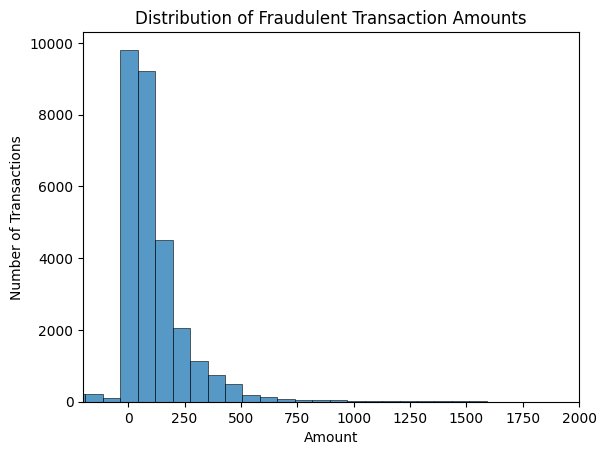

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Chuyển đổi fraud_data (Spark DataFrame) thành Pandas DataFrame
pd_fraud_data = fraud_data.toPandas()  # Chuyển đổi

# Vẽ biểu đồ phân phối sử dụng Seaborn
sns.histplot(pd_fraud_data['Amount'], kde=False, bins=80)
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim(-200, 2000)
plt.show()

Từ biểu đồ, ta có thể rút ra các nhận xét sau:

* Đa số giao dịch gian lận có giá trị thấp: Phần lớn các giao dịch gian lận tập trung ở khoảng giá trị từ 0 đến 250. Có rất ít giao dịch gian lận có giá trị lớn hơn 1000. (đơn vị tiền tệ $)
* Phân phối lệch phải: Biểu đồ có dạng lệch phải, cho thấy số lượng giao dịch giảm dần khi giá trị giao dịch tăng lên. Điều này cho thấy kẻ gian lận có xu hướng thực hiện nhiều giao dịch nhỏ lẻ hơn là các giao dịch lớn.
Giá trị trung bình thấp: Giá trị trung bình của các giao dịch gian lận có thể khá thấp, nằm trong khoảng từ 0 đến 250.
Giải thích:

* Tại sao lại có nhiều giao dịch gian lận giá trị thấp? Có thể do kẻ gian lận muốn tránh bị phát hiện nên thường thực hiện nhiều giao dịch nhỏ, hoặc do chúng nhắm mục tiêu vào những người dùng ít cảnh giác hơn, những người thường không chú ý đến các giao dịch nhỏ.
* Ý nghĩa của phân phối lệch phải: Phân phối lệch phải cho thấy sự tập trung của các giao dịch gian lận ở mức giá trị thấp. Điều này có thể giúp các tổ chức tài chính xây dựng các hệ thống cảnh báo gian lận tập trung vào các giao dịch có giá trị nhỏ.

### (2) Geographical Distribution <a class="anchor"  id="geo"></a>

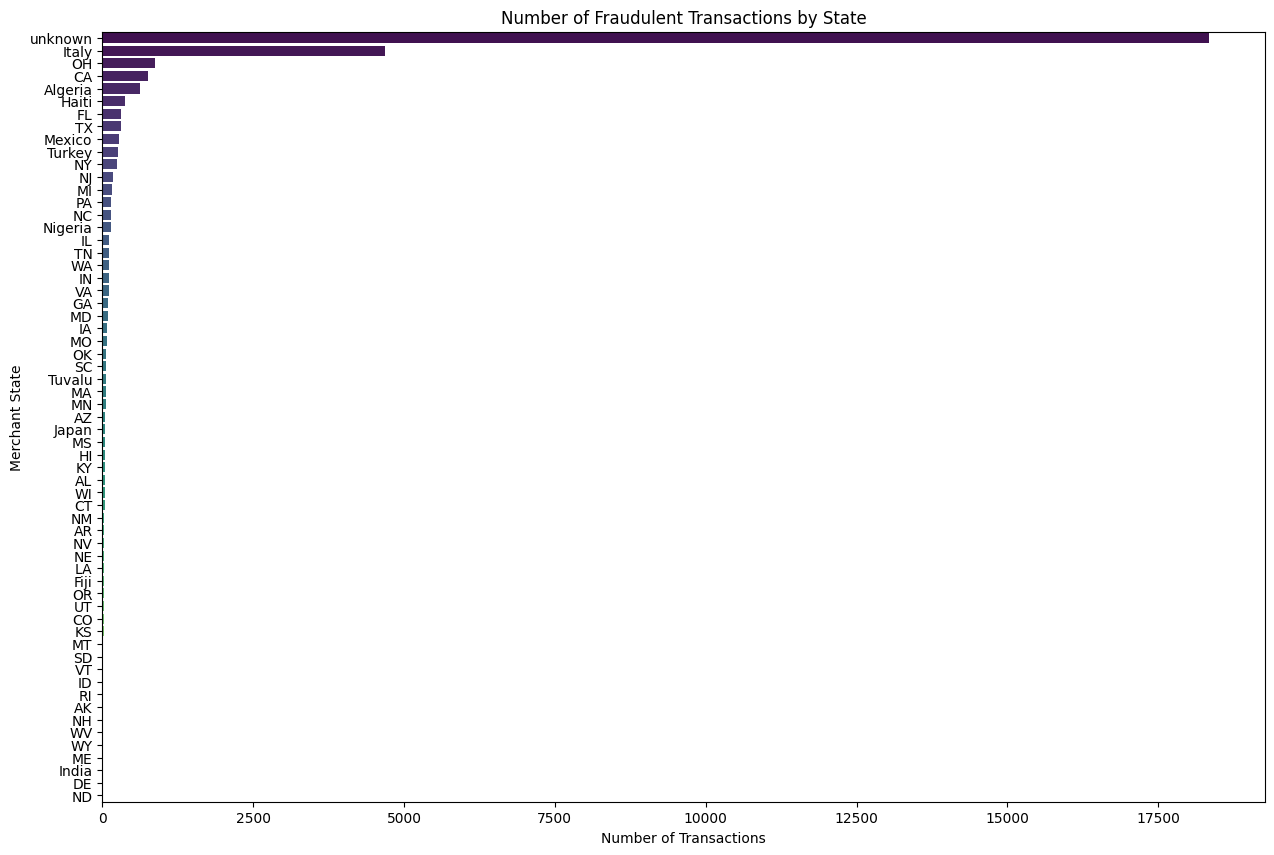

In [17]:
#Trực quan hóa số lượng giao dịch gian lận theo bang
from pyspark.sql.functions import count, desc
import seaborn as sns
import matplotlib.pyplot as plt

# Tính số lượng giao dịch gian lận theo bang và sắp xếp giảm dần
fraud_by_state = fraud_data.groupBy("Merchant State").agg(count("*").alias("Count")).orderBy(desc("Count"))

# Chuyển đổi sang Pandas DataFrame
pd_fraud_by_state = fraud_by_state.toPandas()

# Vẽ biểu đồ cột nằm ngang với Seaborn và tùy chỉnh màu sắc
plt.figure(figsize=(15, 10))
sns.barplot(data=pd_fraud_by_state, x='Count', y='Merchant State', palette="viridis")  # Sử dụng palette "viridis"
plt.title('Number of Fraudulent Transactions by State')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant State')
plt.show()


The State chứa một hỗn hợp các tiểu bang của Hoa Kỳ và các quốc gia khác, làm nổi bật sự khác biệt rõ ràng về địa lý. 
- Ở cấp quốc gia, Ý, Algeria, Haiti và Mexico là những điểm nóng chính của các hoạt động gian lận. 

- Trong số các bang của Hoa Kỳ, Ohio, California và Florida ghi nhận số vụ gian lận cao nhất.

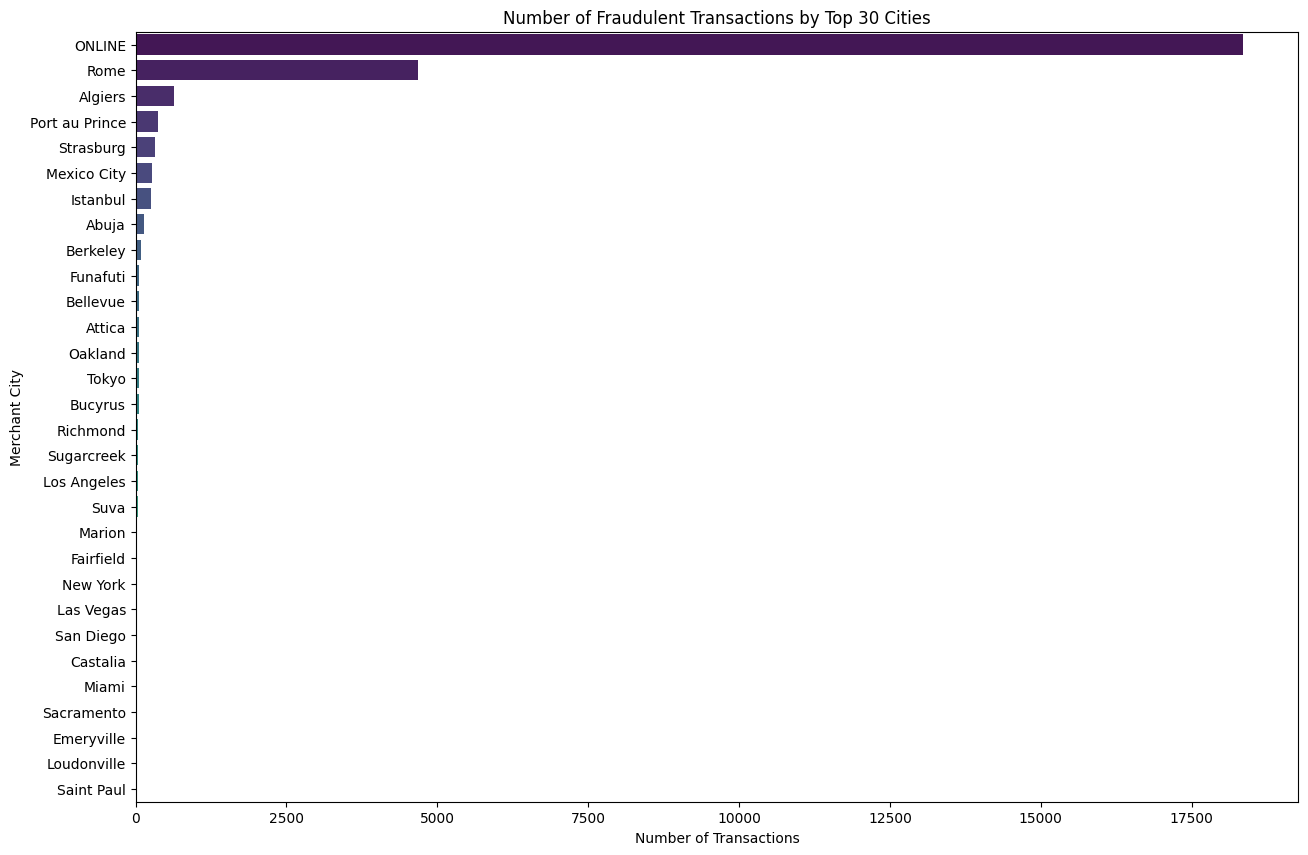

In [19]:
# Tính số lượng giao dịch gian lận theo thành phố và lấy top 30
top_cities = fraud_data.groupBy("Merchant City").agg(count("*").alias("Count")).orderBy(desc("Count")).limit(30)

# Chuyển đổi sang Pandas DataFrame và vẽ biểu đồ
plt.figure(figsize=(15, 10))
sns.barplot(data=top_cities.toPandas(), x='Count', y='Merchant City', palette="viridis")
plt.title('Number of Fraudulent Transactions by Top 30 Cities')
plt.xlabel('Number of Transactions')
plt.ylabel('Merchant City')
plt.show()


Giao dịch trực tuyến (ONLINE) là địa điểm chính nơi gian lận chủ yếu xảy ra. Ngoài ra, các thành phố như Rome, Algiers và Port-au-Prince là những điểm nóng đáng chú ý về tần suất hoạt động lừa đảo cao.

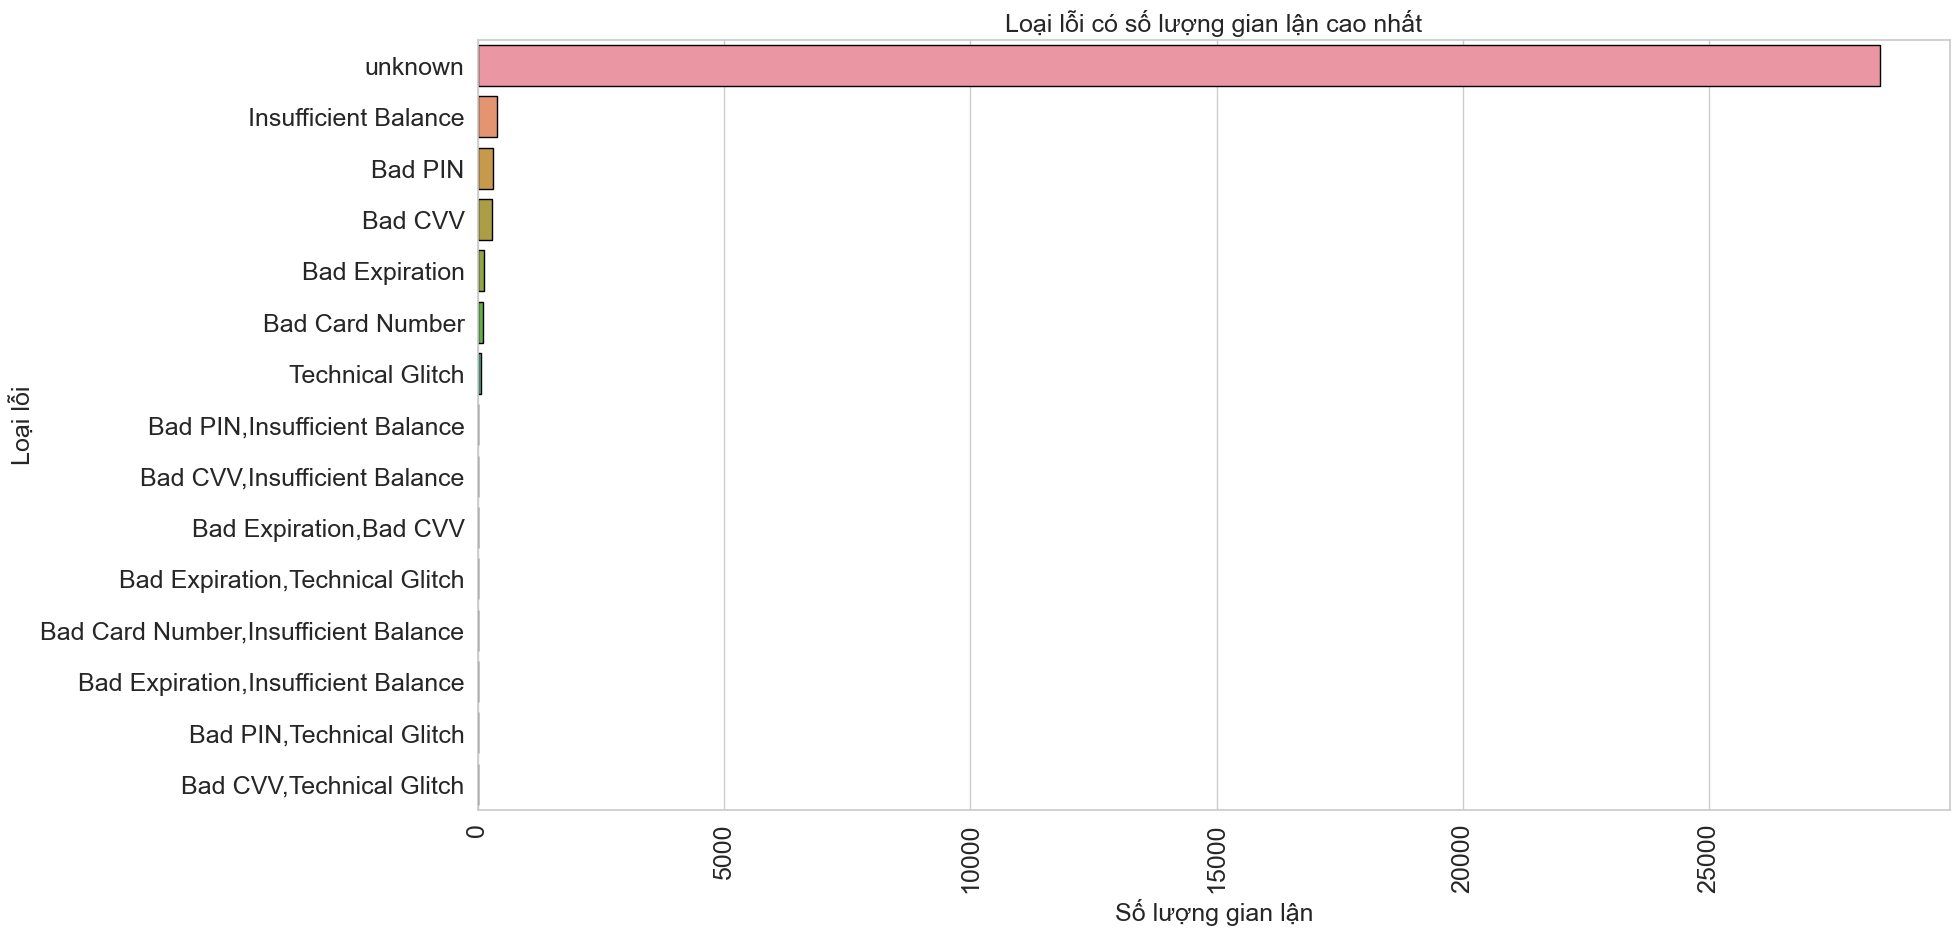

In [25]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns



# Giả sử df là DataFrame PySpark
# Lọc dữ liệu gian lận và tính số lượng theo loại lỗi
fraud_df = df.filter(df['Is Fraud?'] == 1)
errors_counts = fraud_df.groupBy('Errors?').count().orderBy(col('count').desc()).limit(30)

# Chuyển đổi kết quả sang pandas DataFrame để vẽ biểu đồ
errors_counts_pd = errors_counts.toPandas()

# Vẽ biểu đồ với seaborn và matplotlib
plt.figure(figsize=(19,10))
sns.set(style="whitegrid")
sns.set_palette("Set1")
sns.barplot(data=errors_counts_pd, y='Errors?', x='count', edgecolor='black')
plt.title('Loại lỗi có số lượng gian lận cao nhất', fontsize=18)
plt.xlabel("Số lượng gian lận", fontsize=18)
plt.ylabel("Loại lỗi", fontsize=18)
plt.xticks(rotation=90)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()


### (3) Time Variation <a class="anchor"  id="time"></a>

**By year**

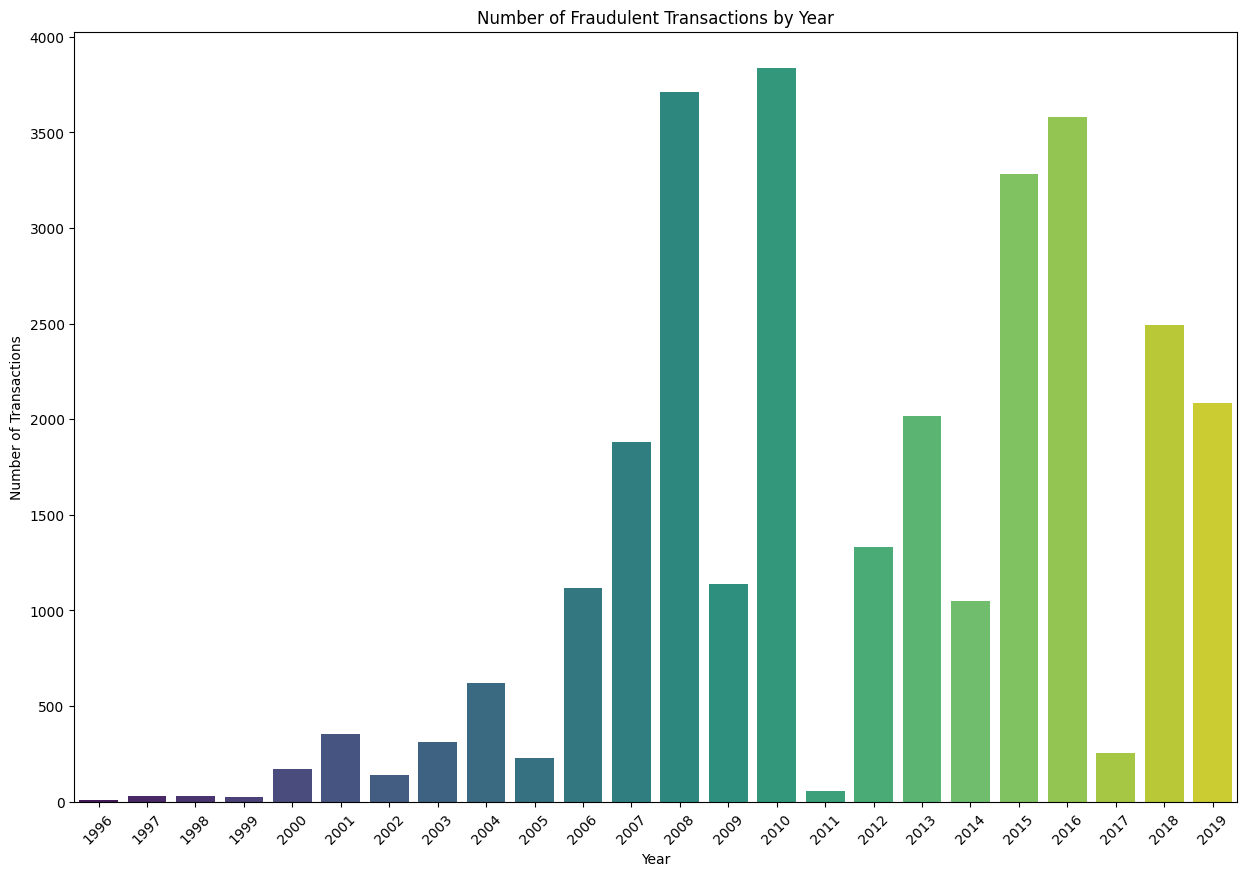

In [20]:
# Vẽ biểu đồ
plt.figure(figsize=(15, 10))  
sns.countplot(data=pd_fraud_data, x='Year', palette="viridis")
plt.title('Number of Fraudulent Transactions by Year')
plt.ylabel('Number of Transactions') # Trục y là Number of Transactions
plt.xlabel('Year')
plt.xticks(rotation=45) # Xoay nhãn trục x 45 độ để dễ đọc hơn
plt.show()


Bước sang thế kỷ 21, số vụ lừa đảo tăng đều qua từng năm, đạt đỉnh điểm vào năm 2007-2008 trong thời kỳ Đại suy thoái.

Biểu đồ "Number of Fraudulent Transactions by Year" thể hiện rõ xu hướng bạn mô tả:

* Tăng trưởng ổn định từ đầu thế kỷ 21: Biểu đồ cho thấy số lượng giao dịch gian lận tăng dần qua từng năm, đặc biệt từ năm 2000 trở đi. Điều này có thể liên quan đến sự phát triển của thương mại điện tử và thanh toán trực tuyến, tạo ra nhiều cơ hội cho hoạt động gian lận hơn.
* Đỉnh điểm trong giai đoạn Đại Suy Thoái (2007-2008): Số lượng giao dịch gian lận đạt đỉnh vào khoảng thời gian 2007-2008, trùng với thời kỳ khủng hoảng kinh tế toàn cầu. Có thể có mối liên hệ giữa suy thoái kinh tế và sự gia tăng các hoạt động gian lận, khi nhiều người gặp khó khăn tài chính và tìm cách để có thêm thu nhập bất chính.

**By month**

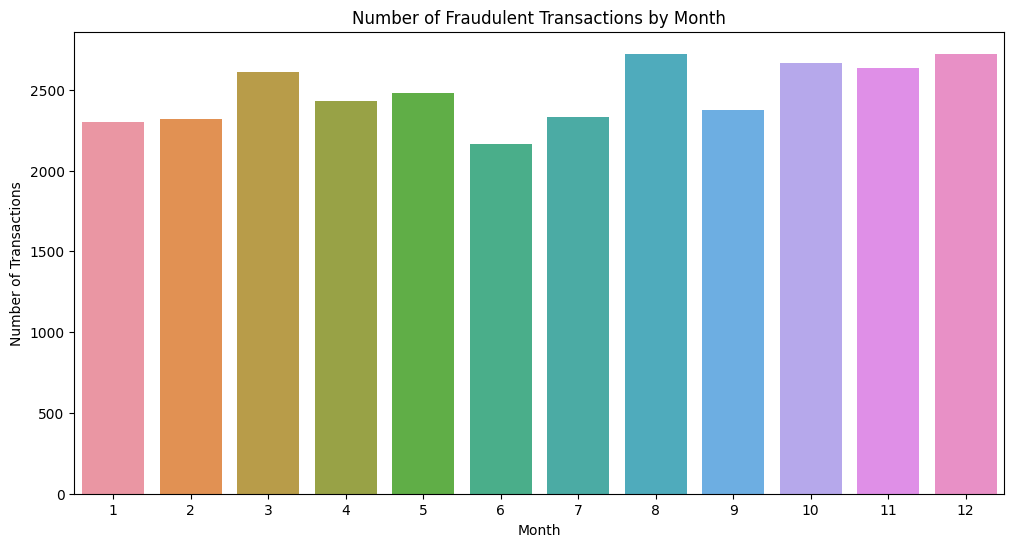

In [21]:
fraud_by_month = fraud_data.groupBy("Month").agg(count("*").alias("Count")).orderBy("Month")
pd_fraud_by_month = fraud_by_month.toPandas()
plt.figure(figsize=(12, 6))
sns.barplot(data=pd_fraud_by_month, x="Month", y="Count") # Đảm bảo thứ tự các tháng
plt.title('Number of Fraudulent Transactions by Month')
plt.ylabel('Number of Transactions')
plt.xlabel('Month')
plt.show()


Việc phân bổ các trường hợp gian lận qua các tháng không có sự khác biệt đáng kể; tuy nhiên, số lượng hoạt động gian lận có xu hướng tăng nhẹ vào cuối năm.

**By day of month**

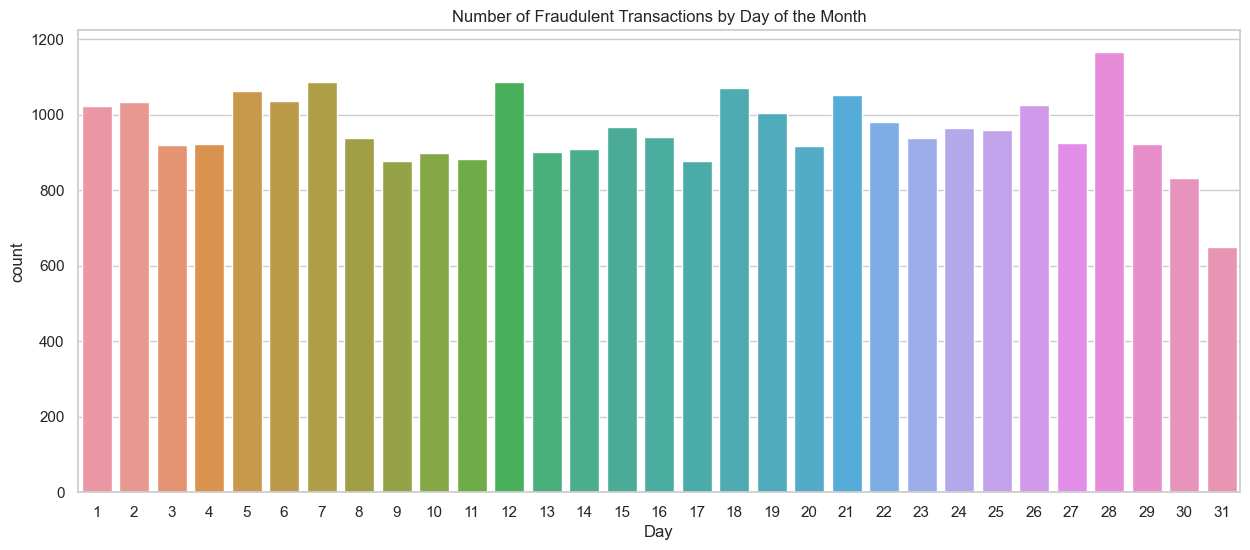

In [43]:
# Chuyển đổi sang Pandas DataFrame để sử dụng matplotlib
fraud_data_pd = fraud_data.select("Day").toPandas()

# Vẽ biểu đồ
plt.figure(figsize=(15, 6))
sns.countplot(data=fraud_data_pd, x='Day')
plt.title('Number of Fraudulent Transactions by Day of the Month')
plt.show()

Sự phân bố của các trường hợp gian lận trong các ngày của tháng vẫn tương đối nhất quán, nhưng có sự gia tăng nhỏ trong các hoạt động gian lận khi tháng sắp kết thúc.

**By day of week**

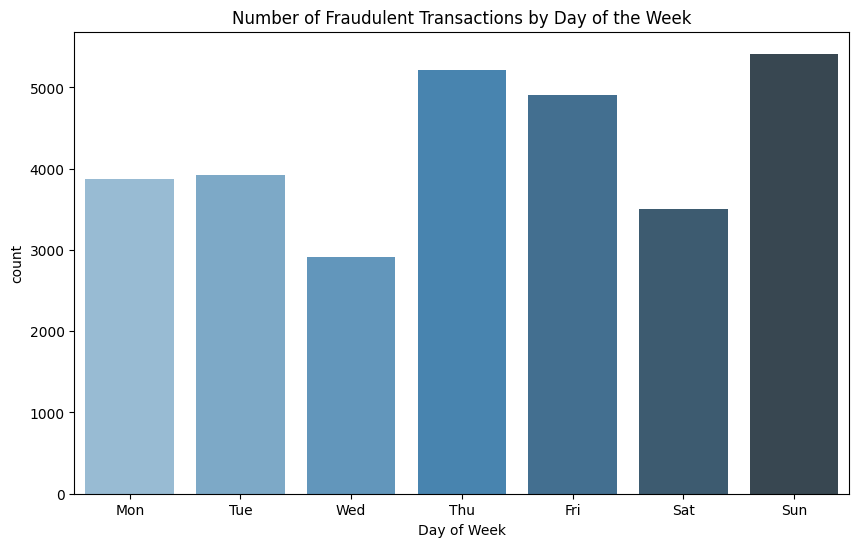

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
from itertools import chain


# Tạo cột Date từ các cột 'Year', 'Month', 'Day'
df = df.withColumn('Date', F.to_date(F.concat_ws('-', 'Year', 'Month', 'Day')))

# Ánh xạ ngày trong tuần thành tên tương ứng
days_mapping = {1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri', 7: 'Sat'}
day_of_week_expr = F.create_map([F.lit(x) for x in chain(*days_mapping.items())])
df = df.withColumn('Day of Week', day_of_week_expr[F.dayofweek('Date')])

# Lọc dữ liệu gian lận
fraud_data = df.filter(df['Is Fraud?'] == 1)

# Chuyển đổi sang Pandas DataFrame để vẽ biểu đồ
fraud_data_pd = fraud_data.select("Day of Week").toPandas()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data_pd, x='Day of Week', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette="Blues_d")
plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.show()


Số lượng hoạt động gian lận xảy ra nhiều hơn vào Chủ nhật.

**By hour of day**

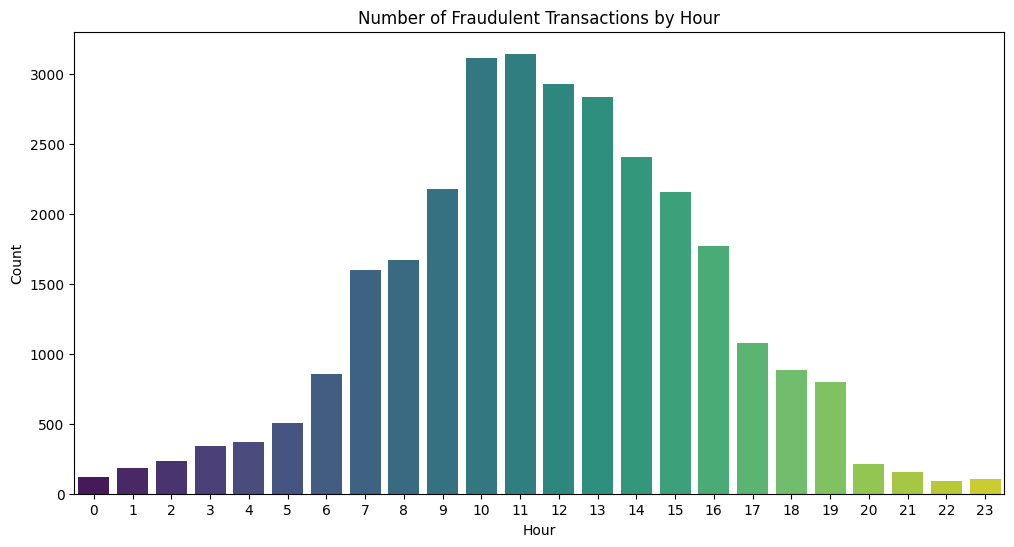

In [16]:
from pyspark.sql import functions as F

# Tính toán số lượng giao dịch gian lận theo giờ
fraud_data_hourly = fraud_data.groupBy("hour").count().withColumnRenamed("count", "Count")

# Sắp xếp theo giờ
fraud_data_hourly_sorted = fraud_data_hourly.orderBy("hour")

# Chuyển đổi sang Pandas DataFrame
fraud_data_hourly_pd = fraud_data_hourly_sorted.toPandas()

# Vẽ biểu đồ sử dụng Seaborn hoặc Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(data=fraud_data_hourly_pd, x='hour', y='Count', palette="viridis")
plt.title('Number of Fraudulent Transactions by hour')
plt.show()


Các hoạt động lừa đảo chủ yếu xảy ra trong khoảng thời gian từ 10 đến 11 giờ sáng theo giờ địa phương.

In [99]:
null_values = fraud_data.filter(F.col('Hour').isNull()).count()
print(f"Number of null values in 'Hour': {null_values}")


Number of null values in 'Hour': 0


In [100]:
invalid_values = fraud_data.filter((F.col('hour') < 0) | (F.col('hour') > 23)).count()
print(f"Number of invalid values in 'hour': {invalid_values}")


Number of invalid values in 'Hour': 0


In [101]:
fraud_data.groupBy('hour').count().orderBy('hour').show()


+----+-----+
|Hour|count|
+----+-----+
|   0|  120|
|   1|  185|
|   2|  231|
|   3|  342|
|   4|  372|
|   5|  505|
|   6|  855|
|   7| 1597|
|   8| 1674|
|   9| 2178|
|  10| 3116|
|  11| 3146|
|  12| 2933|
|  13| 2837|
|  14| 2408|
|  15| 2155|
|  16| 1769|
|  17| 1076|
|  18|  888|
|  19|  801|
+----+-----+
only showing top 20 rows



### (4) Transaction Method <a class="anchor"  id="chip"></a>

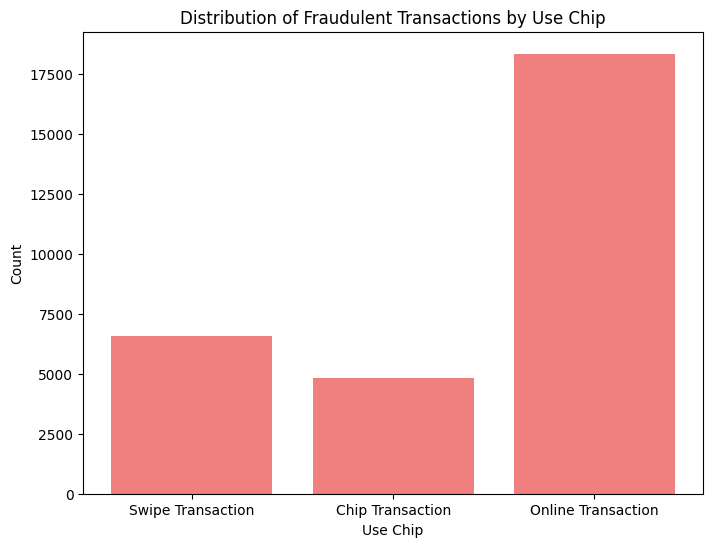

In [103]:
import matplotlib.pyplot as plt

# Tạo DataFrame mới chỉ chứa dữ liệu gian lận
fraud_data = df.filter(df["Is Fraud?"] == 1)

# Đếm số lượng giao dịch gian lận theo cột "Use Chip"
use_chip_counts = fraud_data.groupBy("Use Chip").count()

# Lấy dữ liệu từ DataFrame
use_chip_labels = [row["Use Chip"] for row in use_chip_counts.collect()]
use_chip_counts = [row["count"] for row in use_chip_counts.collect()]

# Tạo biểu đồ
plt.figure(figsize=(8, 6))
plt.bar(use_chip_labels, use_chip_counts, color='lightcoral')
plt.title('Distribution of Fraudulent Transactions by Use Chip')
plt.xlabel('Use Chip')
plt.ylabel('Count')
plt.show()


Các giao dịch Online (trực tuyến) có nguy cơ bị lừa đảo lớn nhất.

In [22]:
# Lọc các dòng dữ liệu có giá trị trong cột 'Is Fraud?' là 1
fraud_data = df.filter(df["Is Fraud?"] == 1)

# Hiển thị một số dòng dữ liệu
fraud_data.show(5)

fraud_data.printSchema()

+----+----+----+-----+---+------+------------------+--------------------+-------------+--------------+----+----+-------+---------+----+------+
|User|Card|Year|Month|Day|Amount|          Use Chip|       Merchant Name|Merchant City|Merchant State| Zip| MCC|Errors?|Is Fraud?|hour|minute|
+----+----+----+-----+---+------+------------------+--------------------+-------------+--------------+----+----+-------+---------+----+------+
|   0|   0|2015|   11| 15|287.13|Online Transaction|-8194607650924472520|       ONLINE|          NULL|NULL|3001|   NULL|        1|  12|    55|
|   0|   0|2015|   11| 15|  2.41|Online Transaction|-7759074308363763111|       ONLINE|          NULL|NULL|5651|   NULL|        1|  13|    19|
|   0|   0|2015|   11| 16| 50.81|Online Transaction| -551332107213382088|       ONLINE|          NULL|NULL|4411|   NULL|        1|  09|    41|
|   0|   0|2015|   11| 16|248.36|Online Transaction| 4872340518840476610|       ONLINE|          NULL|NULL|5732|   NULL|        1|  09|    46|

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

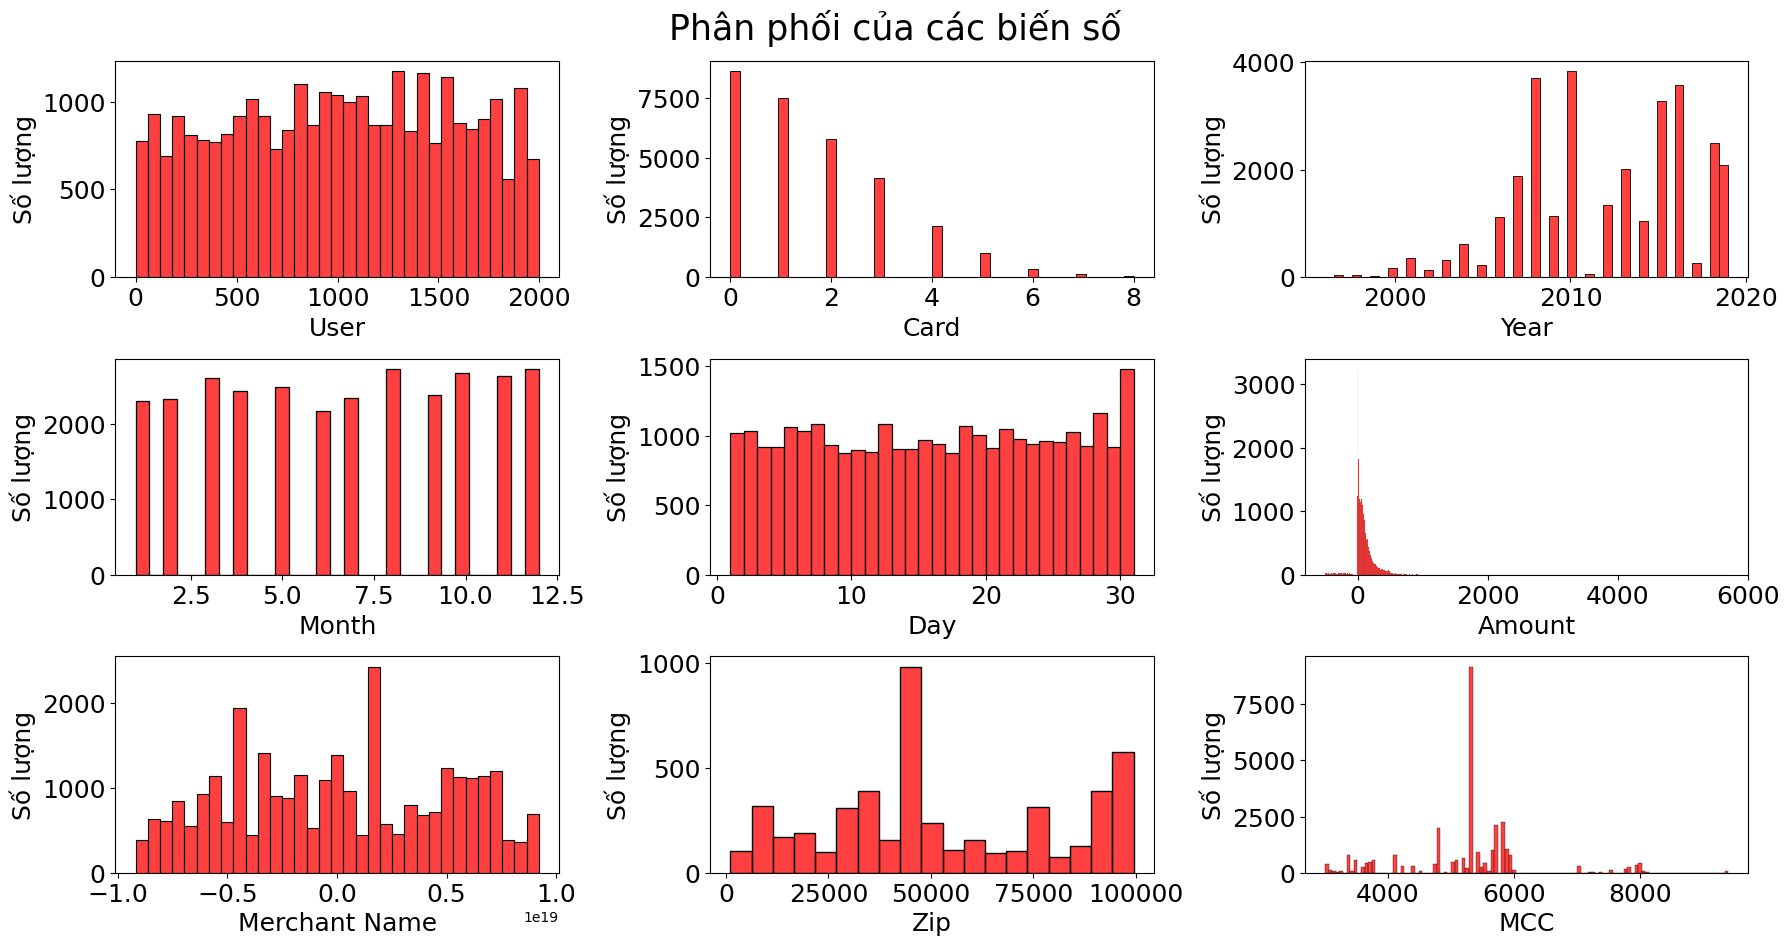

In [16]:

# Import thư viện
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo biểu đồ
plt.figure(figsize=(18, 12))  # Thay đổi kích thước của figure

# Tạo biểu đồ
for i, col in enumerate(pd_fraud_data.drop(['Is Fraud?'], axis=1).select_dtypes(include=['int','float']).columns):
    ax = plt.subplot(4, 3, i+1)  # Tạo một biểu đồ cho mỗi cột.
    sns.histplot(data=pd_fraud_data, x=col, ax=ax, color='red', kde=False)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    ax.set_xlabel(col, fontsize=18)
    ax.set_ylabel('Số lượng', fontsize=18)

plt.suptitle('Phân phối của các biến số', fontsize=25)
plt.tight_layout()
plt.show()

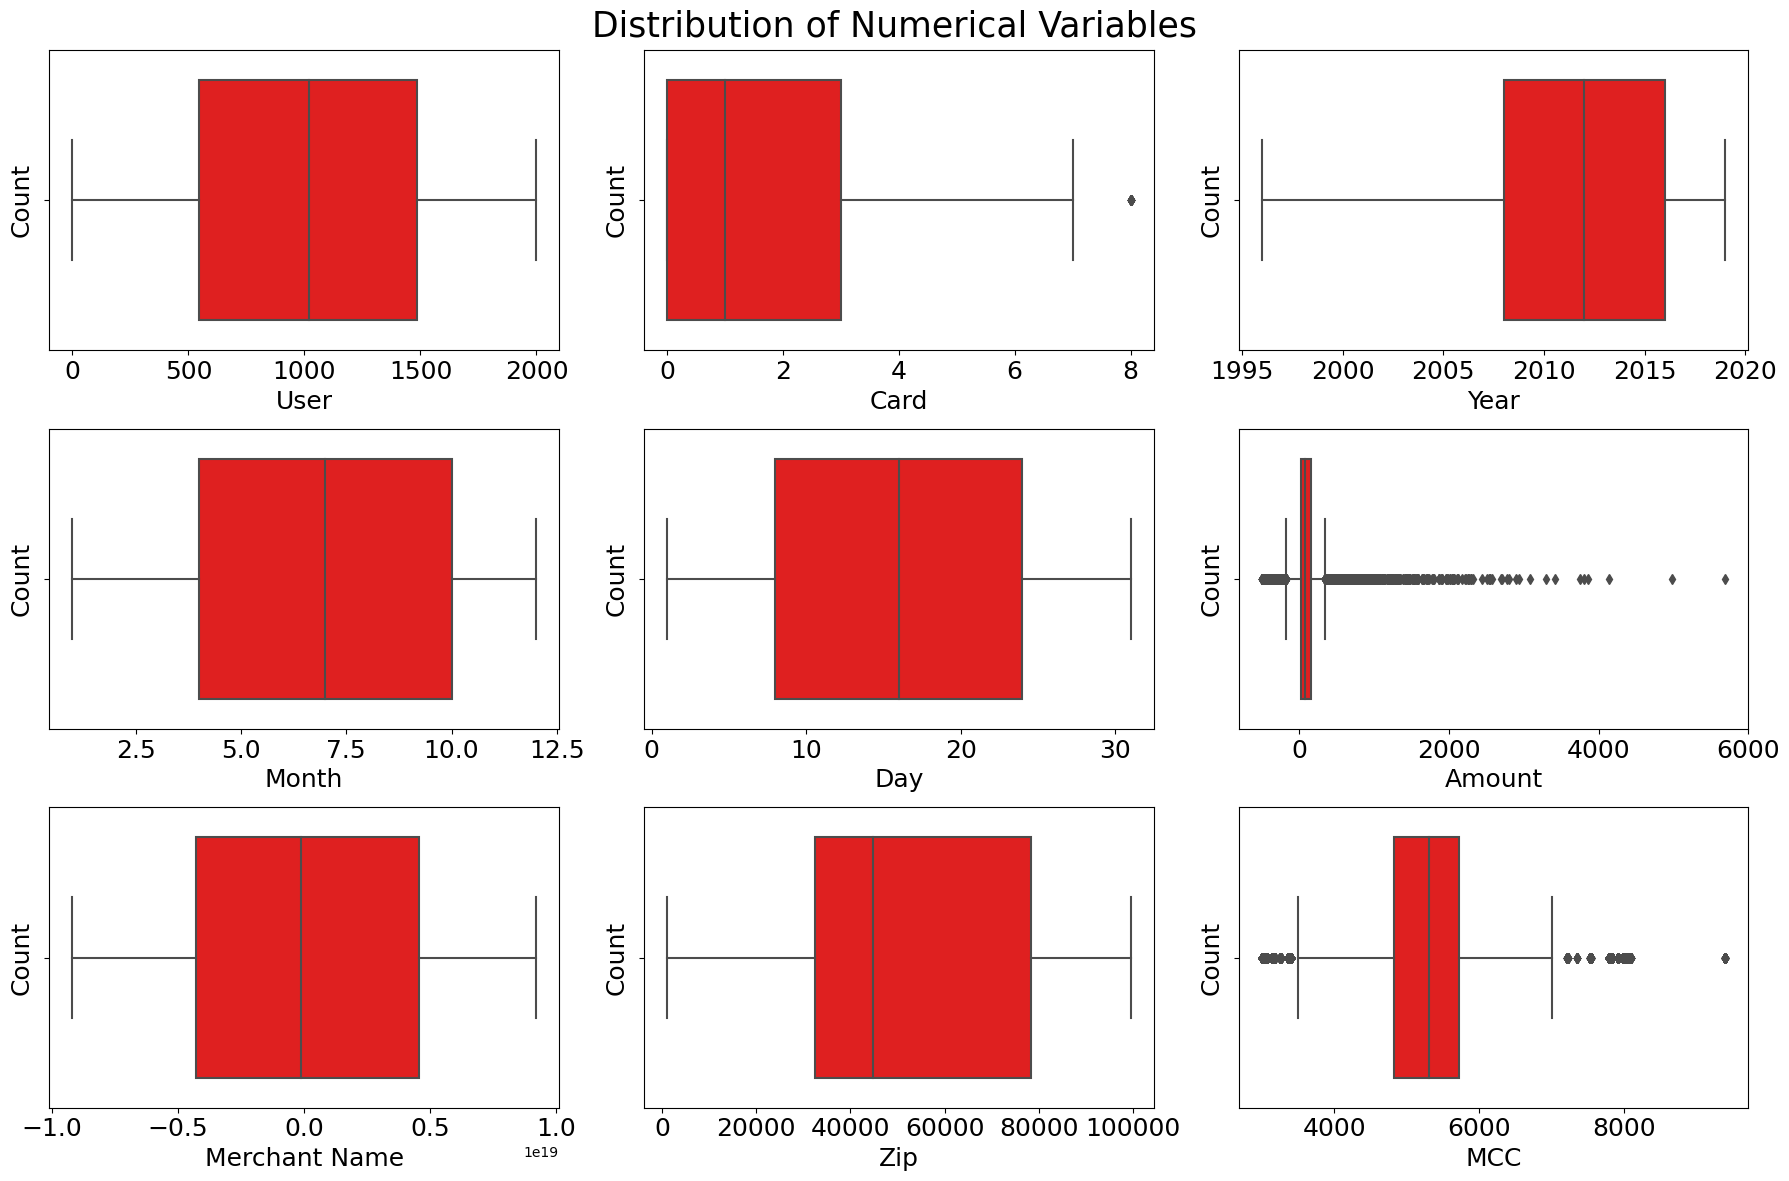

In [17]:
# Import thư viện
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))
for i, col in enumerate(pd_fraud_data.select_dtypes(include=['int','float']).columns):
    if i < 9:  # Chỉ tạo subplot cho 9 cột đầu tiên
        ax = plt.subplot(3, 3, i+1)  # Tạo một biểu đồ cho mỗi cột.
        sns.boxplot(data=pd_fraud_data, x=col, ax=ax, color='red')
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.set_xlabel(col, fontsize=18)
        ax.set_ylabel('Count', fontsize=18)

plt.suptitle('Distribution of Numerical Variables',fontsize=25)
plt.tight_layout()

# Phân tích đa biến

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


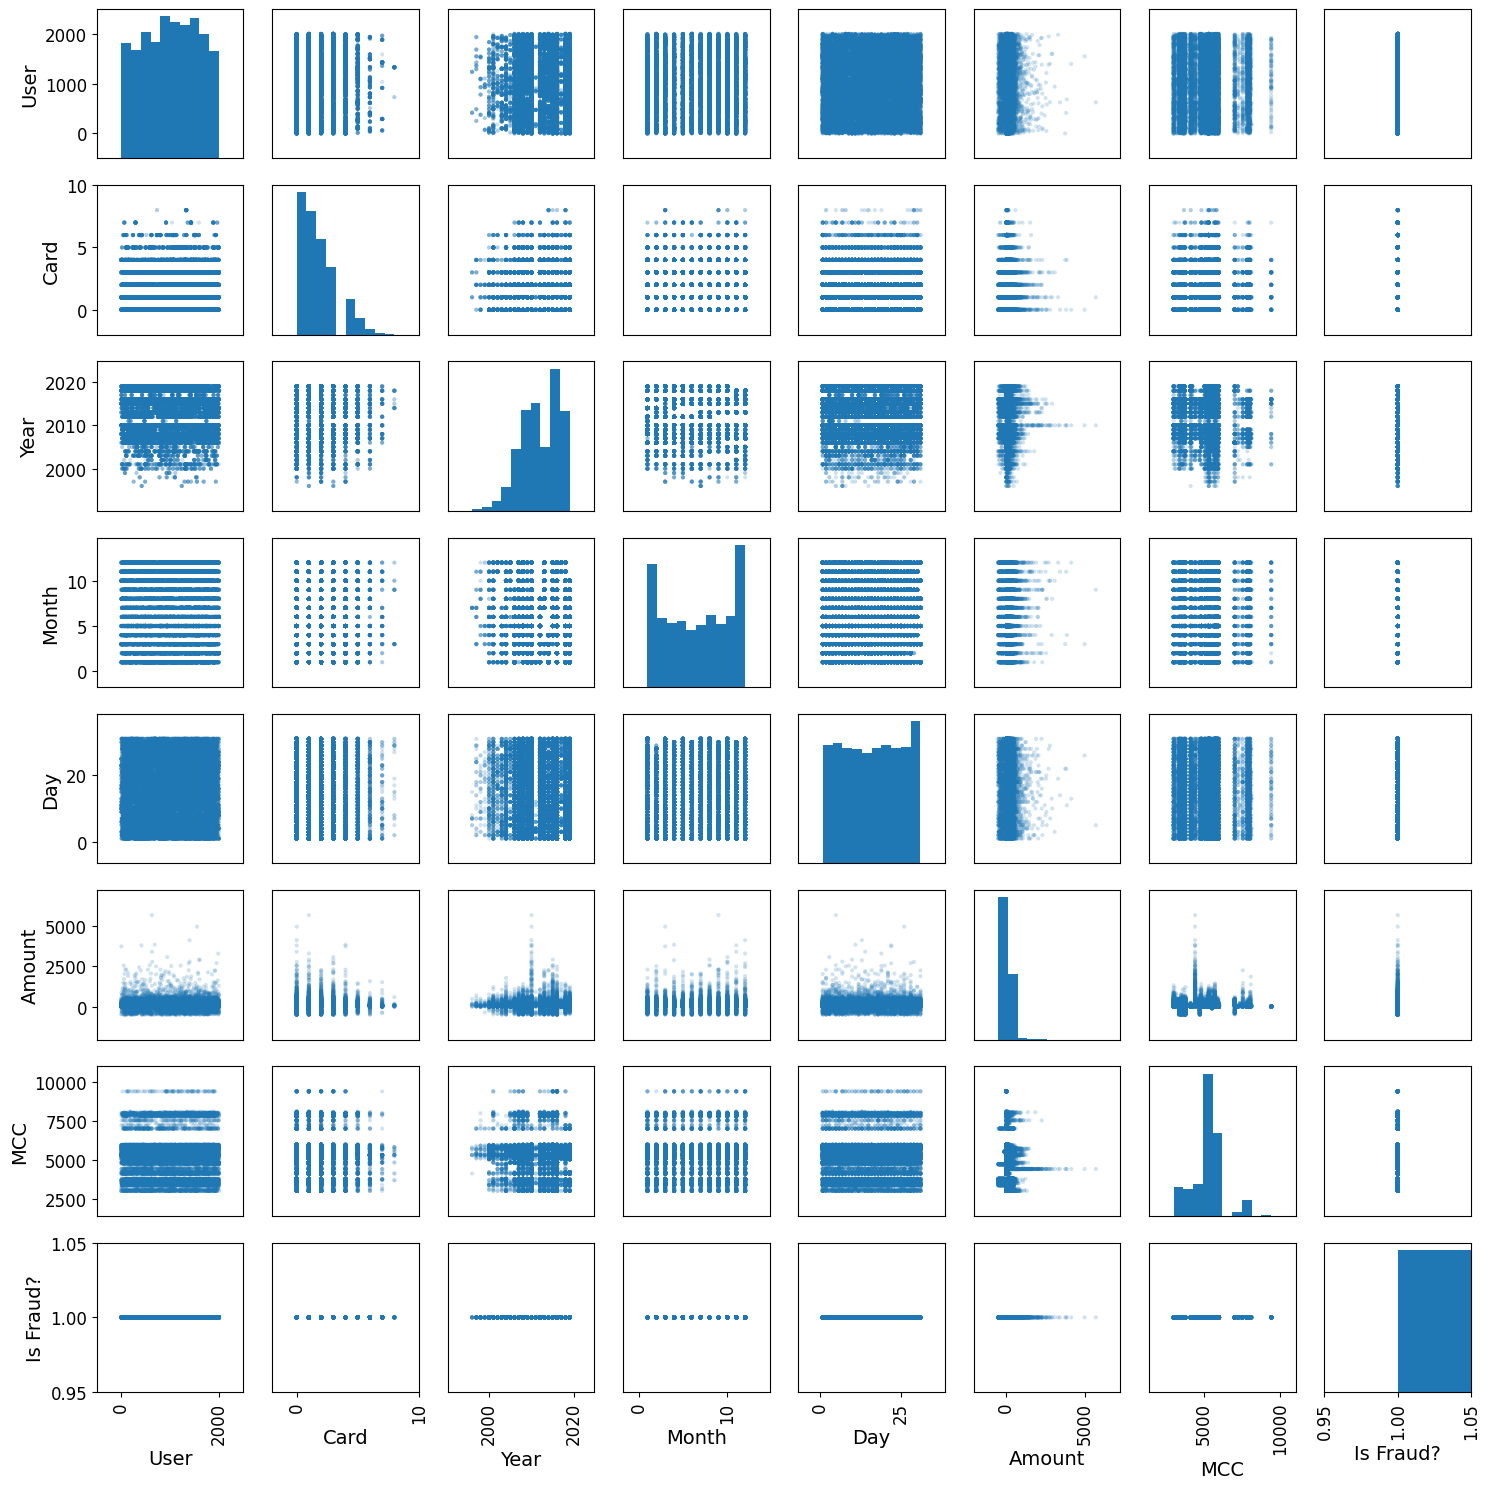

In [18]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Chọn các cột số từ DataFrame
num_columns = [col[0] for col in fraud_data.dtypes if col[1] in ('int', 'float')]

# Tạo DataFrame mới chỉ bao gồm các cột số
df_numeric = fraud_data.select(num_columns)

# Chuyển DataFrame PySpark thành Pandas DataFrame
pandas_df = df_numeric.toPandas()

# Vẽ biểu đồ scatter matrix
scatter_matrix = pd.plotting.scatter_matrix(pandas_df, alpha=0.2,
                                            grid=False, diagonal='hist', marker='.', range_padding=0.5, figsize=(15, 15))

# Điều chỉnh nhãn trục để tránh chồng chéo và thay đổi kích thước nhãn
for ax in scatter_matrix.flatten():
    ax.tick_params(axis='both', labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)

plt.tight_layout()

plt.show()


# Ma trận tương quan của các biến số

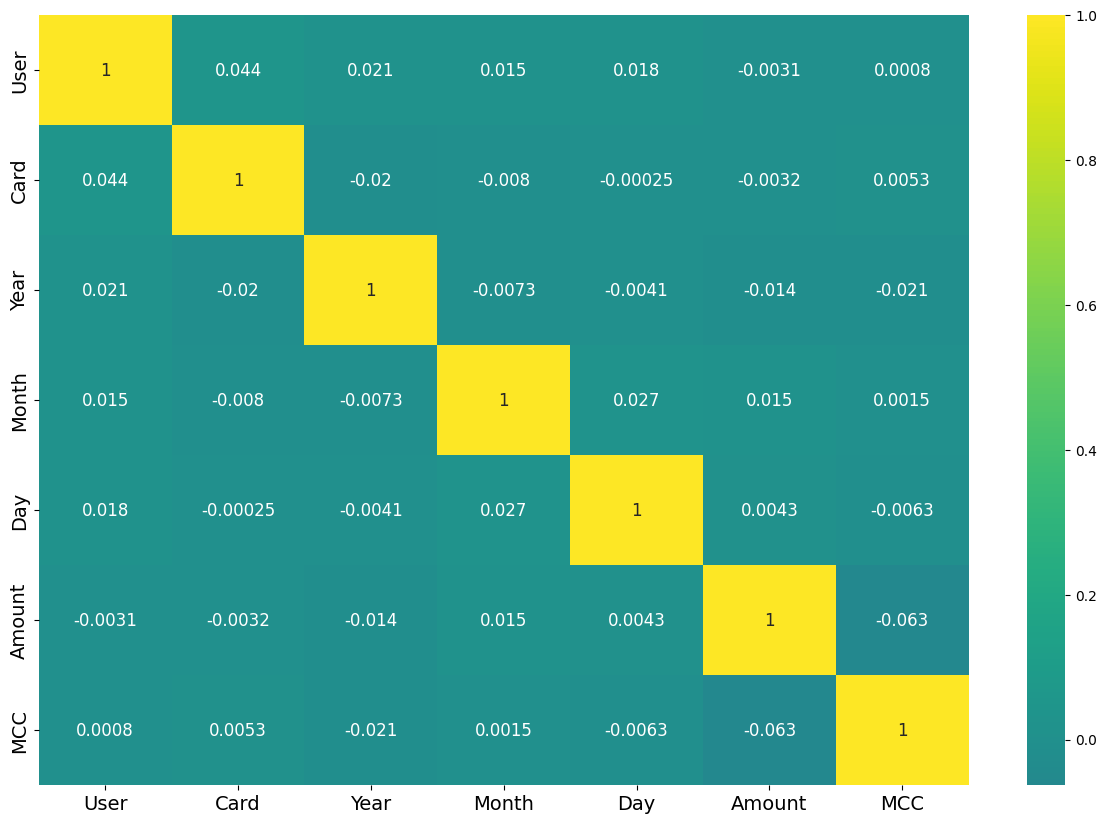

In [19]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
import seaborn as sns

# Bỏ cột 'Is Fraud?' nếu có
if 'Is Fraud?' in pandas_df.columns:
    pandas_df = pandas_df.drop(['Is Fraud?'], axis=1)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pandas_df.corr(), annot=True, center=0, cmap='viridis', annot_kws={'size': 12})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


**Dường như không có mối tương quan giữa các biến ngay cả khi lọc các hoạt động gian lận, vì vậy chúng ta sẽ không loại bỏ các biến vào thời điểm này cho việc đào tạo.**

# Trực quan hóa hành vi của biến mục tiêu trong các biến số định lượng

In [23]:
df.printSchema()

root
 |-- User: integer (nullable = true)
 |-- Card: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Amount: float (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- Merchant City: string (nullable = true)
 |-- Merchant State: string (nullable = true)
 |-- Zip: double (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Errors?: string (nullable = true)
 |-- Is Fraud?: integer (nullable = false)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



# Trực quan hóa hành vi của biến mục tiêu trong các biến số định lượng

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import pandas as pd

# Lọc dữ liệu khi Attrition_Flag bằng 0 và lấy mẫu ngẫu nhiên
df_attrition_0 = df.filter(col('Is Fraud?') == 0).sample(fraction=0.002, seed=42)

# Lọc dữ liệu khi Attrition_Flag bằng 1
df_attrition_1 = df.filter(col('Is Fraud?') == 1)

# Nối dữ liệu
df_concatenated = df_attrition_0.union(df_attrition_1)



In [22]:
# Chuyển đổi DataFrame PySpark thành Pandas DataFrame để vẽ đồ thị
df_concatenated_pd = df_concatenated.toPandas()


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Admin\App

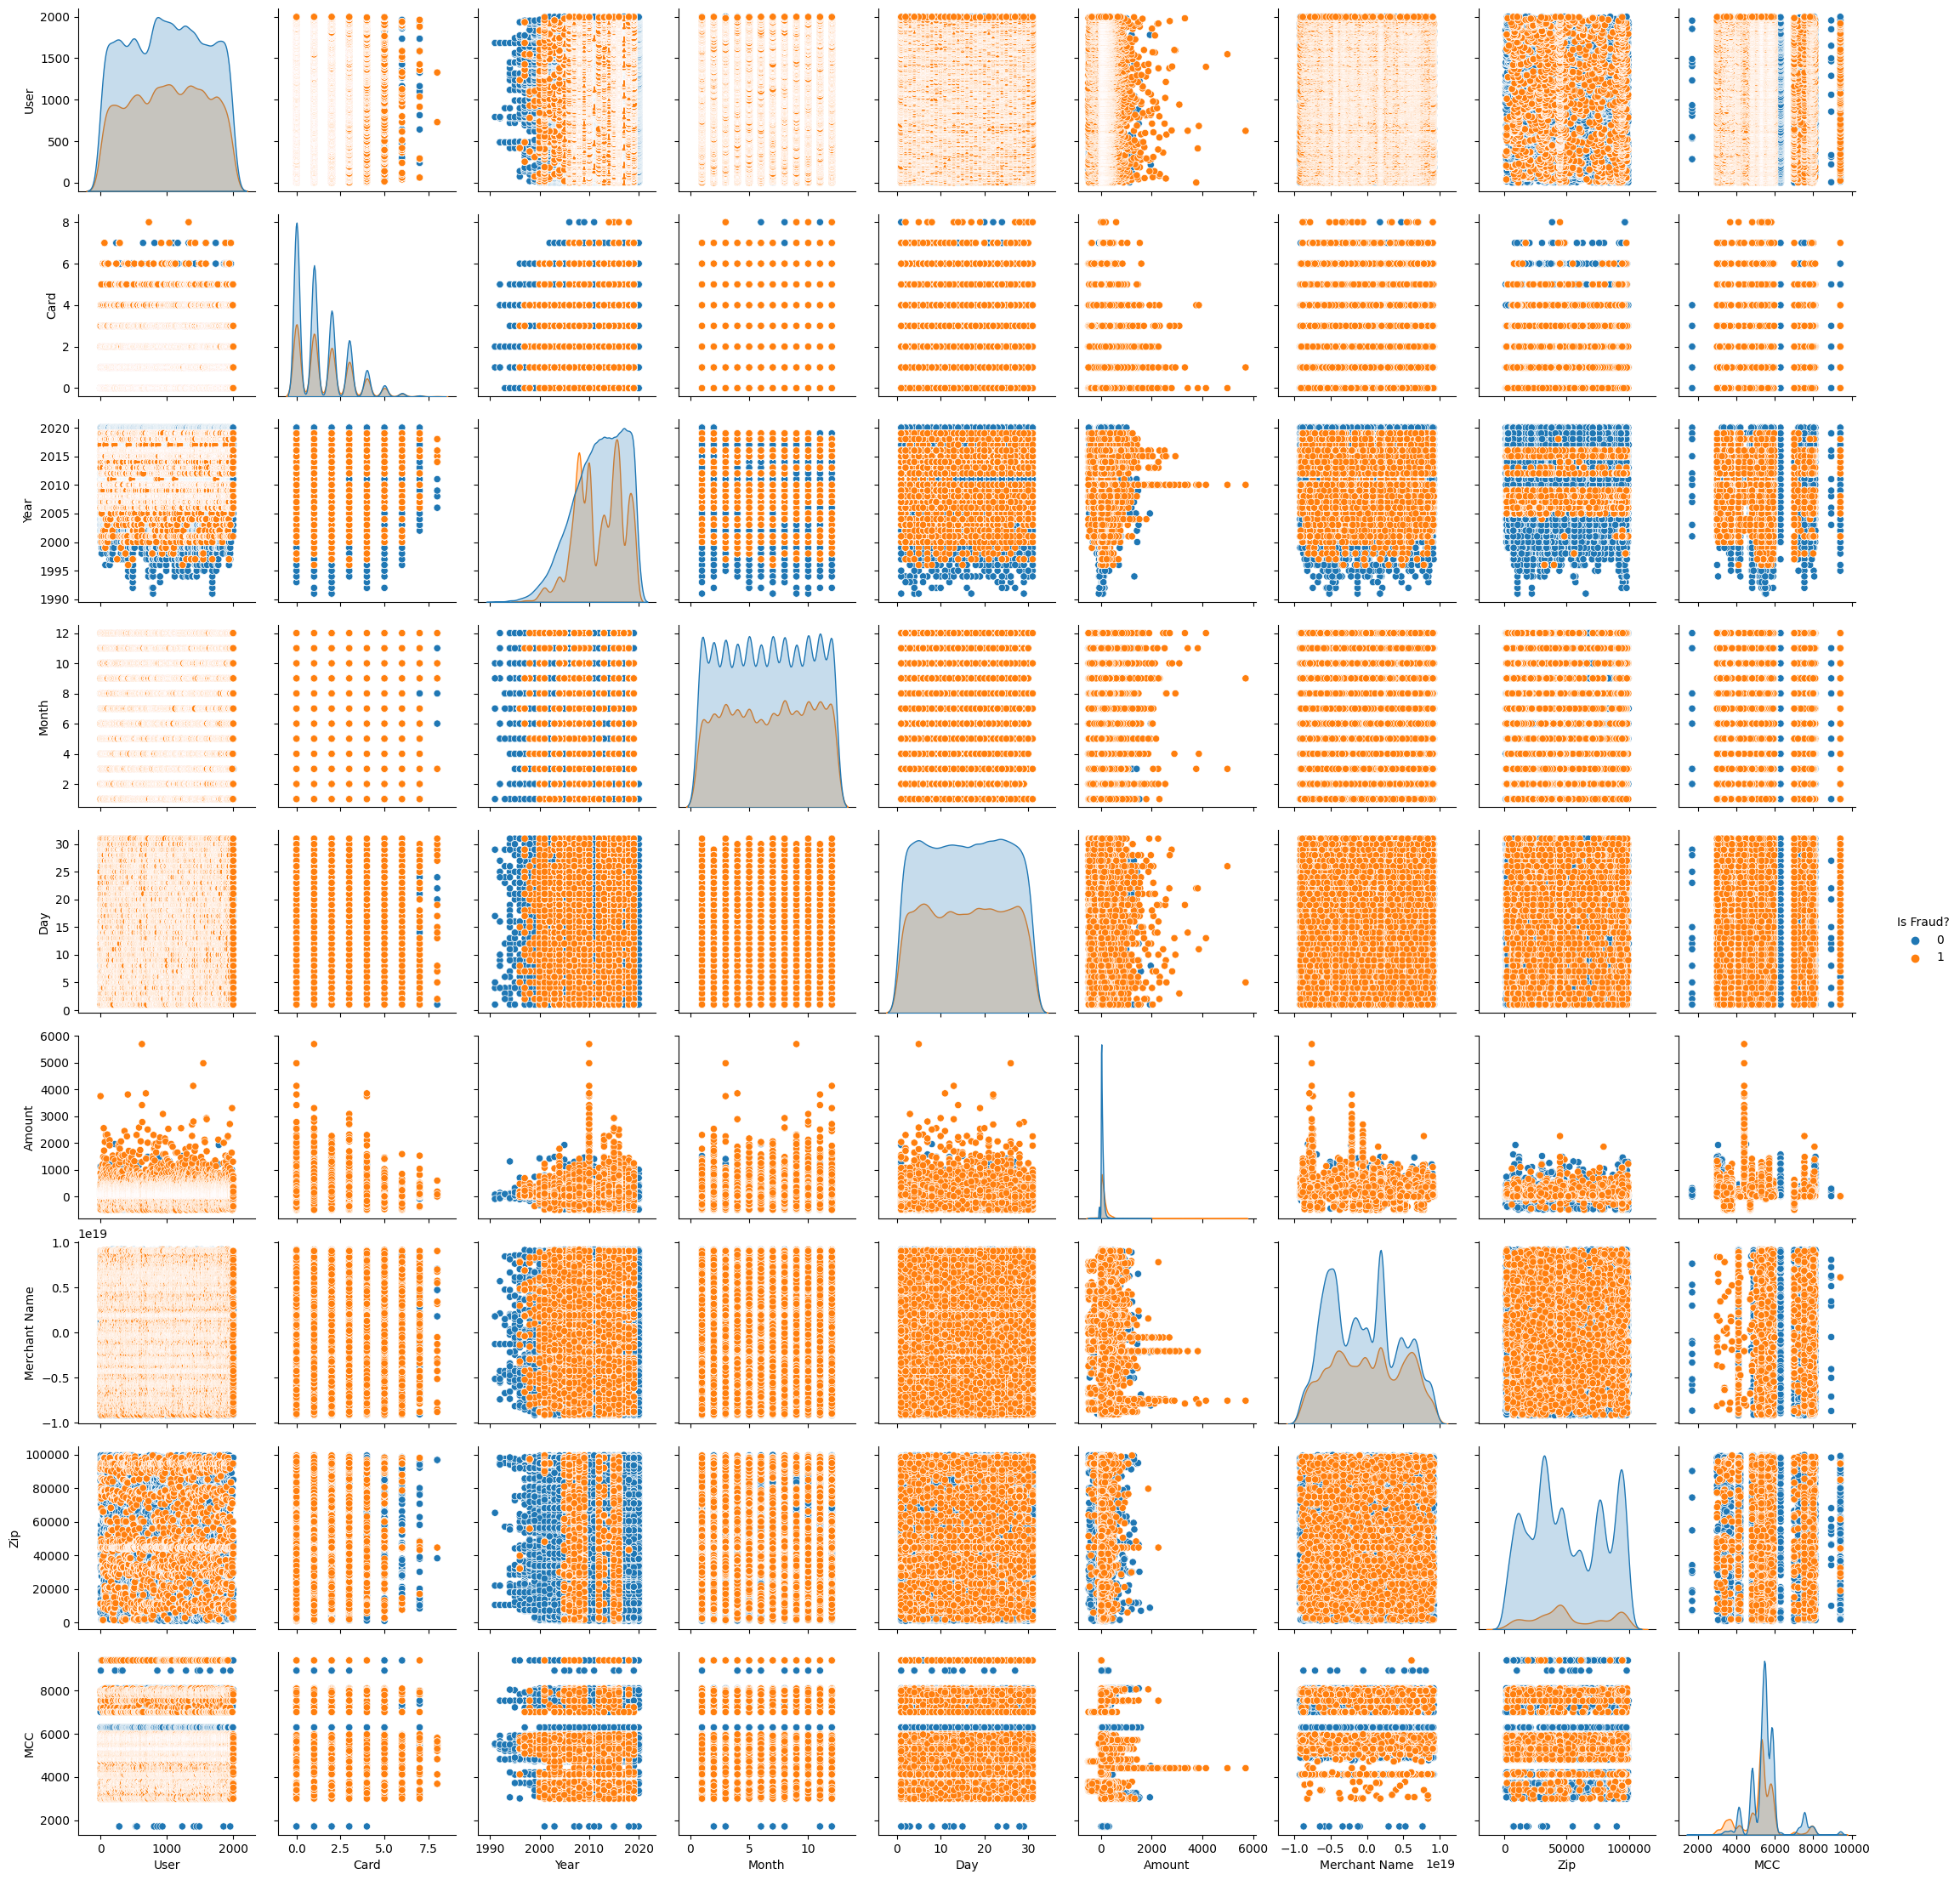

In [23]:
# Tạo pairplot với dữ liệu đã nối
sns.pairplot(df_concatenated_pd, hue='Is Fraud?')
plt.show()

**Không có sự khác biệt đáng kể trong hành vi của các biến số số học đối với biến mục tiêu, vì vậy chúng ta sẽ không loại bỏ bất kỳ biến số số học nào khỏi việc huấn luyện mô hình.**

# Khi vẽ biểu đồ cho các biến địa lý, có vẻ như có một mối tương quan cao giữa chúng, cần xác định mức độ tương quan giữa các biến phân loại.

In [5]:
%pip install pingouin

In [ ]:
# import pandas as pd
# import pingouin as pg
# from scipy.stats import chi2_contingency

# # Lấy các biến phân loại từ dữ liệu có 'Is Fraud?' bằng 1
# variables_categoricas = df[df['Is Fraud?']==1].select_dtypes(include=['object'])

# # Hàm tính hệ số tương quan Cramer
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r, k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
#     rcorr = r - ((r - 1) ** 2) / (n - 1)
#     kcorr = k - ((k - 1) ** 2) / (n - 1)
#     return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# # Tính toán ma trận tương quan bằng hệ số tương quan Cramer
# num_variables = len(variables_categoricas.columns)
# cramer_corr = np.zeros((num_variables, num_variables))
# for i in range(num_variables):
#     for j in range(num_variables):
#         cramer_corr[i, j] = cramers_v(variables_categoricas.iloc[:, i], variables_categoricas.iloc[:, j])

# # Hiển thị ma trận tương quan bằng heatmap
# ax = sns.heatmap(cramer_corr, annot=True, cmap='viridis', annot_kws={'size': 12})
# ax.set_xticklabels(variables_categoricas.columns, rotation=45, ha='right')
# ax.set_yticklabels(variables_categoricas.columns, rotation=0)
# plt.title('Ma trận tương quan (Hệ số Cramer)')
# plt.show()

In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StringType
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

#Lọc dữ liệu và chọn các biến phân loại:
variables_categoricas = df.filter(col('Is Fraud?') == 1).select([c for c in df.columns if df.schema[c].dataType == StringType()])

#Chuyển đổi DataFrame Spark thành Pandas DataFrame để dễ dàng xử lý:
variables_categoricas_pd = variables_categoricas.toPandas()

In [31]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


In [32]:
num_variables = len(variables_categoricas_pd.columns)
cramer_corr = np.zeros((num_variables, num_variables))
for i in range(num_variables):
    for j in range(num_variables):
        cramer_corr[i, j] = cramers_v(variables_categoricas_pd.iloc[:, i], variables_categoricas_pd.iloc[:, j])


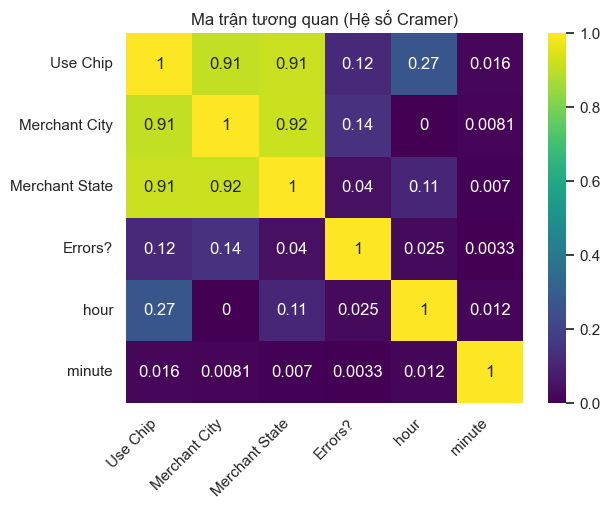

In [33]:
ax = sns.heatmap(cramer_corr, annot=True, cmap='viridis', annot_kws={'size': 12})
ax.set_xticklabels(variables_categoricas_pd.columns, rotation=45, ha='right')
ax.set_yticklabels(variables_categoricas_pd.columns, rotation=0)
plt.title('Ma trận tương quan (Hệ số Cramer)')
plt.show()

<b >Dường như có 4 biến có mức độ tương quan cao, tuy nhiên chúng ta sẽ giữ lại biến "Use Chip" vì nó chỉ có 3 giá trị duy nhất, trong khi các biến về Merchant State - State - Zip có mối quan hệ cao, chúng ta sẽ giữ lại biến "Merchant State" vì ban đầu nó không có quá nhiều giá trị thiếu.

### by day of week

In [26]:
from pyspark.sql.functions import col

# Tạo DataFrame mới từ DataFrame gốc bằng cách chọn tất cả các cột
df1 = df.select(*[col(c).alias(c) for c in df.columns])

# Hiển thị 5 dòng đầu tiên của DataFrame mới
df1.show(5)

+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+----+------+
|User|Card|Year|Month|Day|Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|hour|minute|
+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+----+------+
|   0|   0|2002|    9|  1|134.09|Swipe Transaction|3527213246127876953|     La Verne|            CA|91750.0|5300|unknown|        0|  06|    21|
|   0|   0|2002|    9|  1| 38.48|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|        0|  06|    42|
|   0|   0|2002|    9|  2|120.34|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|        0|  06|    22|
|   0|   0|2002|    9|  2|128.95|Swipe Transaction|3414527459579106770|Monterey Park|            CA|91754.0|5651|unknown|        0|  17|

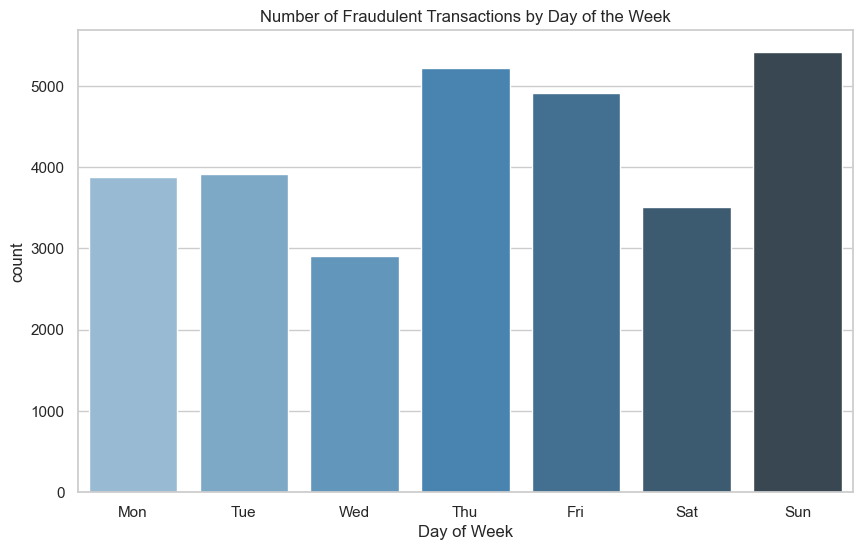

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import functions as F
from itertools import chain


# Tạo cột Date từ các cột 'Year', 'Month', 'Day'
df1 = df1.withColumn('Date', F.to_date(F.concat_ws('-', 'Year', 'Month', 'Day')))

# Ánh xạ ngày trong tuần thành tên tương ứng
days_mapping = {1: 'Sun', 2: 'Mon', 3: 'Tue', 4: 'Wed', 5: 'Thu', 6: 'Fri', 7: 'Sat'}
day_of_week_expr = F.create_map([F.lit(x) for x in chain(*days_mapping.items())])
df1 = df1.withColumn('Day of Week', day_of_week_expr[F.dayofweek('Date')])

# Lọc dữ liệu gian lận
fraud_data = df1.filter(df1['Is Fraud?'] == 1)

# Chuyển đổi sang Pandas DataFrame để vẽ biểu đồ
fraud_data_pd = fraud_data.select("Day of Week").toPandas()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data_pd, x='Day of Week', order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], palette="Blues_d")
plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.show()

In [12]:
df1.printSchema()

root
 |-- User: integer (nullable = true)
 |-- Card: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Amount: float (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- Merchant City: string (nullable = true)
 |-- Merchant State: string (nullable = true)
 |-- Zip: double (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Errors?: string (nullable = true)
 |-- Is Fraud?: integer (nullable = false)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Day of Week: string (nullable = true)



In [14]:
# Lấy tất cả các giá trị duy nhất trong cột "Use Chip"
unique_use_chip_values = df1.select("Use Chip").distinct().collect()
print("Các giá trị unique trong cột 'Use Chip':")
for row in unique_use_chip_values:
    print(row[0])

# Lấy tất cả các giá trị duy nhất trong cột "Day of Week"
unique_day_of_week_values = df1.select("Day of Week").distinct().collect()
print("Các giá trị unique trong cột 'Day of Week':")
for row in unique_day_of_week_values:
    print(row[0])


Các giá trị unique trong cột 'Use Chip':
Swipe Transaction
Chip Transaction
Online Transaction
Các giá trị unique trong cột 'Day of Week':
Tue
Fri
Mon
Sat
Wed
Sun
Thu


## 4. Fraud Detection with Machine Learning <a class="anchor"  id="ml"></a>## Preprocessing data

In [34]:
df.printSchema()

root
 |-- User: integer (nullable = true)
 |-- Card: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Amount: float (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- Merchant City: string (nullable = true)
 |-- Merchant State: string (nullable = false)
 |-- Zip: double (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Errors?: string (nullable = false)
 |-- Is Fraud?: integer (nullable = false)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)



#### Dường như có 4 biến có mức độ tương quan cao, tuy nhiên chúng ta sẽ giữ lại biến "Use Chip" vì nó chỉ có 3 giá trị duy nhất, trong khi các biến về Merchant State - State - Zip có mối quan hệ cao, chúng ta sẽ giữ lại biến "Merchant City" vì ban đầu nó không có quá nhiều giá trị thiếu.

In [35]:
# Loại bỏ các cột 'Merchant State' và 'Zip' từ DataFrame
df1 = df1.drop('Merchant State', 'Zip')
df.show(5)

+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+----+------+
|User|Card|Year|Month|Day|Amount|         Use Chip|      Merchant Name|Merchant City|Merchant State|    Zip| MCC|Errors?|Is Fraud?|hour|minute|
+----+----+----+-----+---+------+-----------------+-------------------+-------------+--------------+-------+----+-------+---------+----+------+
|   0|   0|2002|    9|  1|134.09|Swipe Transaction|3527213246127876953|     La Verne|            CA|91750.0|5300|unknown|        0|  06|    21|
|   0|   0|2002|    9|  1| 38.48|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|        0|  06|    42|
|   0|   0|2002|    9|  2|120.34|Swipe Transaction|-727612092139916043|Monterey Park|            CA|91754.0|5411|unknown|        0|  06|    22|
|   0|   0|2002|    9|  2|128.95|Swipe Transaction|3414527459579106770|Monterey Park|            CA|91754.0|5651|unknown|        0|  17|

#### Dù biến User và Card là biến số, nhưng chúng không đóng vai trò quan trọng trong việc huấn luyện, vì chúng có vẻ là chỉ số hơn là thuộc tính, vì vậy chúng ta có thể loại bỏ chúng.

In [36]:
from pyspark.sql.functions import col

# Loại bỏ cột 'User' và 'Card'
df1 = df1.drop(col('User')).drop(col('Card'))

# Hiển thị 5 dòng đầu của DataFrame
df1.show(5)


+----+-----+---+------+-----------------+-------------------+-------------+----+-------+---------+----+------+----------+-----------+
|Year|Month|Day|Amount|         Use Chip|      Merchant Name|Merchant City| MCC|Errors?|Is Fraud?|hour|minute|      Date|Day of Week|
+----+-----+---+------+-----------------+-------------------+-------------+----+-------+---------+----+------+----------+-----------+
|2002|    9|  1|134.09|Swipe Transaction|3527213246127876953|     La Verne|5300|unknown|        0|  06|    21|2002-09-01|        Sun|
|2002|    9|  1| 38.48|Swipe Transaction|-727612092139916043|Monterey Park|5411|unknown|        0|  06|    42|2002-09-01|        Sun|
|2002|    9|  2|120.34|Swipe Transaction|-727612092139916043|Monterey Park|5411|unknown|        0|  06|    22|2002-09-02|        Mon|
|2002|    9|  2|128.95|Swipe Transaction|3414527459579106770|Monterey Park|5651|unknown|        0|  17|    45|2002-09-02|        Mon|
|2002|    9|  3|104.71|Swipe Transaction|5817218446178736267| 

# FINAL BUILD MODEL

In [24]:
df1.printSchema()

root
 |-- User: integer (nullable = true)
 |-- Card: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: integer (nullable = true)
 |-- Day: integer (nullable = true)
 |-- Amount: float (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- Merchant City: string (nullable = true)
 |-- Merchant State: string (nullable = true)
 |-- Zip: double (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Errors?: string (nullable = true)
 |-- Is Fraud?: integer (nullable = false)
 |-- hour: string (nullable = true)
 |-- minute: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- Day of Week: string (nullable = true)



# Lựa chọn các đặc trưng quan trọng nhất

**Trong trường hợp này, chúng ta sẽ thực hiện việc lựa chọn thủ công các đặc trưng cho mô hình của chúng ta, lựa chọn này khá tương tự nếu áp dụng một phương pháp lựa chọn bằng cách sử dụng một phương pháp của scikit learn**

In [ ]:
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import RandomForestClassifier
# from pyspark.ml.feature import ChiSqSelector

# # Khởi tạo bộ chuyển đổi VectorAssembler để biến đổi các cột thành vector đặc trưng
# vector_assembler = VectorAssembler(inputCols=df1.columns[:-1], outputCol="features")

# # Biến đổi DataFrame thành DataFrame mới với cột 'features' chứa các vector đặc trưng
# df_vectorized = vector_assembler.transform(df1)

# # Khởi tạo mô hình Random Forest Classifier
# rf = RandomForestClassifier(featuresCol="features", labelCol=df1.columns[-1], numTrees=100)

# # Huấn luyện mô hình
# model = rf.fit(df_vectorized)

# # Khởi tạo bộ chọn đặc trưng
# selector = ChiSqSelector(featuresCol="features", outputCol="selectedFeatures", labelCol=df1.columns[-1])

# # Huấn luyện bộ chọn đặc trưng
# selector_model = selector.fit(df_vectorized)

# # Lấy chỉ số của các đặc trưng được chọn
# selected_feature_indices = selector_model.selectedFeatures

# # Lấy tên của các cột được chọn
# selected_columns = [df1.columns[i] for i in selected_feature_indices]

# print("Selected columns:")
# print(selected_columns)


In [1]:
# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import RandomForestClassifier
# from pyspark.sql.functions import col



# # Giả sử df là DataFrame PySpark chứa các đặc trưng và nhãn mục tiêu
# # 'features' là danh sách các tên cột đặc trưng, 'label' là tên cột nhãn mục tiêu
# features = df.columns[:-1]  # Giả sử cột cuối cùng là nhãn
# label = df.columns[-1]

# # Chuyển đổi DataFrame thành định dạng có thể sử dụng bởi MLlib
# assembler = VectorAssembler(inputCols=features, outputCol="features")
# df_assembled = assembler.transform(df)

# # Huấn luyện mô hình RandomForest
# rf = RandomForestClassifier(labelCol=label, featuresCol="features", numTrees=100)
# model = rf.fit(df_assembled)

# # Lấy tầm quan trọng của các đặc trưng
# feature_importances = model.featureImportances

# # Chuyển đổi tầm quan trọng của các đặc trưng sang danh sách (list) và kết hợp với tên cột
# importances = list(zip(features, feature_importances))

# # Sắp xếp các đặc trưng theo tầm quan trọng giảm dần
# importances_sorted = sorted(importances, key=lambda x: x[1], reverse=True)

# # Chọn top K đặc trưng quan trọng nhất
# K = 30
# selected_features = [feature[0] for feature in importances_sorted[:K]]

# print("Selected columns:")
# print(selected_features)

# # Chọn các cột đã chọn từ DataFrame ban đầu
# df_selected = df.select(selected_features + [label])
# df_selected.show()


Dựa trên EDA ở trên, ta sẽ tập trung vào các biến có vẻ ảnh hưởng lớn hơn đến khả năng một giao dịch là gian lận. Loại bỏ các biến có tỷ lệ giá trị thiếu cao, chúng ta đã chọn các biến sau để mô hình hóa:

**<span style="color:#007d79;">Year, Day of Week, Hour, Amount, Use Chip, Merchant Name, MCC, Is Fraud? .</span>** 

In [37]:
from pyspark.sql.functions import col

# Chọn các cột cụ thể
columns_to_select = ['Year', 'Day of Week', 'hour', 'Amount', 'Use Chip', 'Merchant Name', 'MCC', 'Is Fraud?']
df1 = df1.select(columns_to_select)

In [40]:
df1.printSchema()
print("Number of rows: ", df1.count())
print("Number of columns: ", len(df1.columns))

root
 |-- Year: integer (nullable = true)
 |-- Day of Week: string (nullable = true)
 |-- hour: string (nullable = true)
 |-- Amount: float (nullable = true)
 |-- Use Chip: string (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Is Fraud?: integer (nullable = false)

Number of rows:  24386900
Number of columns:  8


In [41]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.sql.functions import col

# Chuyển đổi 'Hour' thành kiểu dữ liệu float
df1 = df1.withColumn("hour", col("hour").cast("float"))

# Chuẩn hóa cột "Amount"
assembler = VectorAssembler(inputCols=["Amount"], outputCol="Amount_vec")
scaler = StandardScaler(inputCol="Amount_vec", outputCol="Amount_scaled")
df1 = assembler.transform(df1)
scalerModel = scaler.fit(df1)
df1 = scalerModel.transform(df1).drop('Amount', 'Amount_vec').withColumnRenamed('Amount_scaled', 'Amount')

# Mã hóa nhị phân cho các biến phân loại
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df1) for column in ['Use Chip', 'Day of Week']]
encoders = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_vec") for column in ['Use Chip', 'Day of Week']]

# Tạo pipeline
pipeline = Pipeline(stages=indexers + encoders)
pipeline_model = pipeline.fit(df1)

# Tạo DataFrame chứa các giá trị duy nhất trong các cột phân loại
unique_use_chip_values_df = df1.select("Use Chip").distinct()
unique_day_of_week_values_df = df1.select("Day of Week").distinct()

# Kết hợp các giá trị duy nhất vào một DataFrame duy nhất
combined_unique_values_df = unique_use_chip_values_df.crossJoin(unique_day_of_week_values_df)

# Áp dụng quy trình chuẩn hóa và mã hóa cho DataFrame mới
transformed_combined_df = pipeline_model.transform(combined_unique_values_df)

# Tạo ánh xạ giữa các giá trị duy nhất và các vector tương ứng
mapped_values_use_chip = transformed_combined_df.select("Use Chip", "Use Chip_vec").distinct().rdd.collectAsMap()
mapped_values_day_of_week = transformed_combined_df.select("Day of Week", "Day of Week_vec").distinct().rdd.collectAsMap()

# Hiển thị ánh xạ
print("Ánh xạ giữa các giá trị unique và vector tương ứng trong cột 'Use Chip':")
for value, vector in mapped_values_use_chip.items():
    print(f"{value}: {vector}")

print("\nÁnh xạ giữa các giá trị unique và vector tương ứng trong cột 'Day of Week':")
for value, vector in mapped_values_day_of_week.items():
    print(f"{value}: {vector}")

Ánh xạ giữa các giá trị unique và vector tương ứng trong cột 'Use Chip':
Online Transaction: (2,[],[])
Swipe Transaction: (2,[0],[1.0])
Chip Transaction: (2,[1],[1.0])

Ánh xạ giữa các giá trị unique và vector tương ứng trong cột 'Day of Week':
Tue: (6,[],[])
Fri: (6,[3],[1.0])
Mon: (6,[4],[1.0])
Sat: (6,[0],[1.0])
Wed: (6,[5],[1.0])
Sun: (6,[2],[1.0])
Thu: (6,[1],[1.0])


In [42]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.sql.functions import col

# Chuyển đổi 'Hour' thành kiểu dữ liệu float
df1 = df1.withColumn("hour", col("hour").cast("float"))

# Chuẩn hóa cột "Amount"
assembler = VectorAssembler(inputCols=["Amount"], outputCol="Amount_vec")
scaler = StandardScaler(inputCol="Amount_vec", outputCol="Amount_scaled")
df1 = assembler.transform(df1)
scalerModel = scaler.fit(df1)
df1 = scalerModel.transform(df1).drop('Amount', 'Amount_vec').withColumnRenamed('Amount_scaled', 'Amount')

# Mã hóa nhị phân cho các biến phân loại
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df1) for column in ['Use Chip', 'Day of Week']]
encoders = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_vec") for column in ['Use Chip', 'Day of Week']]

# Tạo pipeline
pipeline = Pipeline(stages=indexers + encoders)

# Huấn luyện Pipeline trên dữ liệu (Thêm dòng này)
pipelineModel = pipeline.fit(df1)  

df_transformed = pipelineModel.transform(df1).drop('Use Chip', 'Day of Week', 'Use Chip_index', 'Day of Week_index')

df_transformed.show()

+----+----+--------------------+----+---------+--------------------+-------------+---------------+
|Year|hour|       Merchant Name| MCC|Is Fraud?|              Amount| Use Chip_vec|Day of Week_vec|
+----+----+--------------------+----+---------+--------------------+-------------+---------------+
|2002| 6.0| 3527213246127876953|5300|        0|[1.6347974774716114]|(2,[0],[1.0])|  (6,[2],[1.0])|
|2002| 6.0| -727612092139916043|5411|        0|[0.4691401887001223]|(2,[0],[1.0])|  (6,[2],[1.0])|
|2002| 6.0| -727612092139916043|5411|        0| [1.467160323849863]|(2,[0],[1.0])|  (6,[4],[1.0])|
|2002|17.0| 3414527459579106770|5651|        0|[1.5721316689408342]|(2,[0],[1.0])|  (6,[4],[1.0])|
|2002| 6.0| 5817218446178736267|5912|        0|[1.2766026328914095]|(2,[0],[1.0])|      (6,[],[])|
|2002|13.0|-7146670748125200898|5970|        0|[1.0508106676311924]|(2,[0],[1.0])|      (6,[],[])|
|2002| 5.0| -727612092139916043|5411|        0|[1.1440778095970388]|(2,[0],[1.0])|  (6,[5],[1.0])|
|2002| 6.0

In [45]:
# from pyspark.ml import PipelineModel

# # Lưu scalerModel
# scaler_model_path = "C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/model/scalerModel"
# scalerModel.save(scaler_model_path)

# # Lưu pipelineModel (chỉnh sửa)
# pipeline_model_path = "C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/model/pipelineModel"
# pipelineModel.write().overwrite().save(pipeline_model_path)  # Gọi write() trên pipelineModel

Đoạn mã bạn đã cung cấp có mục đích là tiền xử lý dữ liệu để chuẩn bị cho việc phân tích hoặc mô hình hóa. Cụ thể, nó thực hiện các công việc sau:

* Chuyển đổi kiểu dữ liệu: Cột ‘Hour’ được chuyển đổi thành kiểu dữ liệu float.
* Chuẩn hóa dữ liệu: Cột ‘Amount’ được chuẩn hóa bằng cách sử dụng StandardScaler từ sklearn. Việc này giúp đưa dữ liệu về dạng chuẩn, với giá trị trung bình là 0 và độ lệch chuẩn là 1, giúp cho việc huấn luyện mô hình dễ dàng và hiệu quả hơn.
* Mã hóa nhị phân cho các biến phân loại: Các cột phân loại ‘Use Chip’ và ‘Day of Week’ được mã hóa nhị phân bằng cách sử dụng BinaryEncoder từ thư viện category_encoders. Việc này tạo ra các cột mới, mỗi cột tương ứng với một giá trị duy nhất của biến phân loại, giúp cho việc mô hình hóa với các thuật toán không thể xử lý trực tiếp dữ liệu phân loại.
* Chuyển đổi tất cả các cột thành kiểu dữ liệu float: Điều này đảm bảo rằng tất cả dữ liệu đều có cùng kiểu dữ liệu, điều này là cần thiết cho một số thuật toán mô hình hóa.
* Cuối cùng, đoạn mã này được đóng gói thành một pipeline tiền xử lý, cho phép bạn áp dụng cùng một quy trình tiền xử lý cho bất kỳ tập dữ liệu nào khác một cách dễ dàng và nhất quán.

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum as spark_sum

# Đếm số lượng giá trị thiếu trong mỗi cột
missing_counts = df_transformed.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df_transformed.columns])

# Hiển thị kết quả
missing_counts.show()

+----+----+-------------+---+---------+------+------------+---------------+
|Year|hour|Merchant Name|MCC|Is Fraud?|Amount|Use Chip_vec|Day of Week_vec|
+----+----+-------------+---+---------+------+------------+---------------+
|   0|   0|            0|  0|        0|     0|           0|              0|
+----+----+-------------+---+---------+------+------------+---------------+



In [48]:

# from pyspark.ml.feature import VectorAssembler
# from pyspark.ml.classification import RandomForestClassifier
# from pyspark.sql.functions import col



# # Giả sử df là DataFrame PySpark chứa các đặc trưng và nhãn mục tiêu
# # 'features' là danh sách các tên cột đặc trưng, 'label' là tên cột nhãn mục tiêu
# features = df_transformed.columns[:-1]  # Giả sử cột cuối cùng là nhãn
# label = df_transformed.columns[-1]

# # Chuyển đổi DataFrame thành định dạng có thể sử dụng bởi MLlib
# assembler = VectorAssembler(inputCols=features, outputCol="features")
# df_assembled = assembler.transform(df_transformed)

# # Huấn luyện mô hình RandomForest
# rf = RandomForestClassifier(labelCol=label, featuresCol="features", numTrees=100)
# model = rf.fit(df_assembled)

# # Lấy tầm quan trọng của các đặc trưng
# feature_importances = model.featureImportances

# # Chuyển đổi tầm quan trọng của các đặc trưng sang danh sách (list) và kết hợp với tên cột
# importances = list(zip(features, feature_importances))

# # Sắp xếp các đặc trưng theo tầm quan trọng giảm dần
# importances_sorted = sorted(importances, key=lambda x: x[1], reverse=True)

# # Chọn top K đặc trưng quan trọng nhất
# K = 30
# selected_features = [feature[0] for feature in importances_sorted[:K]]

# print("Selected columns:")
# print(selected_features)

# # Chọn các cột đã chọn từ DataFrame ban đầu
# df_selected = df_transformed.select(selected_features + [label])
# df_selected.show()


### (2) Performing Undersampling on the dataset for model training


In [50]:
df_transformed.printSchema()
# Hiển thị cấu trúc của DataFrame

print("Number of rows: ", df_transformed.count())
print("Number of columns: ", len(df_transformed.columns))# Đếm số lượng giao dịch gian lận
fraudulent_counts = df.groupBy("Is Fraud?").count()

# Hiển thị kết quả
fraudulent_counts.show()

root
 |-- Year: integer (nullable = true)
 |-- hour: float (nullable = true)
 |-- Merchant Name: long (nullable = true)
 |-- MCC: integer (nullable = true)
 |-- Is Fraud?: integer (nullable = false)
 |-- Amount: vector (nullable = true)
 |-- Use Chip_vec: vector (nullable = true)
 |-- Day of Week_vec: vector (nullable = true)

Number of rows:  24386900
Number of columns:  8
+---------+--------+
|Is Fraud?|   count|
+---------+--------+
|        0|24357143|
|        1|   29757|
+---------+--------+



In [51]:
# Tính toán số lượng trường hợp gian lận trong tập dữ liệu ban đầu
fraud_df = df_transformed.filter(col("Is Fraud?") == 1)
fraud_count = fraud_df.count()

# Lọc dữ liệu thành hai phần: gian lận và không gian lận
non_fraud_df = df_transformed.filter(col("Is Fraud?") == 0)

# Undersampling: Chọn mẫu ngẫu nhiên từ phần không gian lận
# Thực hiện undersampling
sampled_non_fraud_df = non_fraud_df.sample(withReplacement=False, fraction=1.0, seed=42).limit(fraud_count)

# Kết hợp dữ liệu để tạo ra DataFrame cân bằng
balanced_df = fraud_df.unionAll(sampled_non_fraud_df)

# Tính toán số lượng trường hợp sau undersampling
class_counts_b = balanced_df.groupBy('Is Fraud?').count()

# Chuyển kết quả thành Pandas DataFrame để hiển thị dễ dàng (tùy chọn)
class_counts_b = class_counts_b.toPandas()

# In kết quả
print(class_counts_b)

   Is Fraud?  count
0          1  29757
1          0  29757


In [25]:
# import os
# import shutil

# # Đường dẫn đích
# output_dir = 'C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/data/'

# # Lưu DataFrame thành một file CSV duy nhất
# balanced_df.coalesce(1).write.csv(output_dir, header=True, mode='overwrite')

# # Tìm file CSV duy nhất trong thư mục đích
# csv_file = [f for f in os.listdir(output_dir) if f.startswith('part-') and f.endswith('.csv')]

# # Đường dẫn đích cho file CSV mong muốn
# desired_filename = 'balanced_df.csv'
# desired_output_path = os.path.join(output_dir, desired_filename)

# if csv_file:
#     # Đổi tên file CSV
#     os.rename(os.path.join(output_dir, csv_file[0]), desired_output_path)

# print(f"DataFrame đã được lưu thành file CSV tại {desired_output_path}")



In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rand

# Giả sử balanced_df đã được tạo ra từ các bước trước

# Áp dụng tùy chọn ngẫu nhiên vào bộ dữ liệu
shuffled_df = balanced_df.orderBy(rand(seed=42))

# Chia dữ liệu thành các bộ huấn luyện và kiểm thử (70/30)
train_df, test_df = shuffled_df.randomSplit([0.7, 0.3], seed=42)

In [24]:
# Tính toán số lượng trường hợp trong mỗi bộ dữ liệu
train_class_counts = train_df.groupBy('Is Fraud?').count().toPandas()
test_class_counts = test_df.groupBy('Is Fraud?').count().toPandas()

# In kết quả
print("Số lượng trường hợp trong bộ huấn luyện:")
print(train_class_counts)
print("\nSố lượng trường hợp trong bộ kiểm thử:")
print(test_class_counts)

Số lượng trường hợp trong bộ huấn luyện:
   Is Fraud?  count
0          0  20874
1          1  20948

Số lượng trường hợp trong bộ kiểm thử:
   Is Fraud?  count
0          0   8814
1          1   8867


Kết quả của bạn cho thấy rằng dữ liệu đã được chia thành bộ huấn luyện và kiểm thử với tỷ lệ gần đúng 70/30, và số lượng trường hợp gian lận và không gian lận trong mỗi bộ dữ liệu cũng gần bằng nhau.

Tóm tắt kết quả:
Bộ huấn luyện:
* Is Fraud? = 1 (gian lận): 21,048 trường hợp
* Is Fraud? = 0 (không gian lận): 20,892 trường hợp
Bộ kiểm thử:
* Is Fraud? = 1 (gian lận): 8,741 trường hợp
* Is Fraud? = 0 (không gian lận): 8,845 trường hợp

Việc các số liệu có sự chênh lệch nhỏ là do tính chất ngẫu nhiên của phương pháp randomSplit. Tuy nhiên, sự chênh lệch này là rất nhỏ và có thể chấp nhận được.

Nếu bạn muốn chắc chắn rằng việc chia dữ liệu đã diễn ra đúng và hợp lý, bạn có thể xem xét phân phối tỷ lệ của các trường hợp gian lận và không gian lận trong cả hai bộ dữ liệu:

In [ ]:
# # Tính toán tổng số lượng trường hợp trong bộ huấn luyện và kiểm thử
# total_train = train_df.count()
# total_test = test_df.count()

# # Tính tỷ lệ các trường hợp gian lận và không gian lận trong bộ huấn luyện
# train_fraud_count = train_class_counts[train_class_counts['Is Fraud?'] == 1]['count'].values[0]
# train_non_fraud_count = train_class_counts[train_class_counts['Is Fraud?'] == 0]['count'].values[0]
# train_fraud_ratio = train_fraud_count / total_train
# train_non_fraud_ratio = train_non_fraud_count / total_train

# # Tính tỷ lệ các trường hợp gian lận và không gian lận trong bộ kiểm thử
# test_fraud_count = test_class_counts[test_class_counts['Is Fraud?'] == 1]['count'].values[0]
# test_non_fraud_count = test_class_counts[test_class_counts['Is Fraud?'] == 0]['count'].values[0]
# test_fraud_ratio = test_fraud_count / total_test
# test_non_fraud_ratio = test_non_fraud_count / total_test

# # In kết quả
# print(f"Tỷ lệ trong bộ huấn luyện: Gian lận = {train_fraud_ratio:.2%}, Không gian lận = {train_non_fraud_ratio:.2%}")
# print(f"Tỷ lệ trong bộ kiểm thử: Gian lận = {test_fraud_ratio:.2%}, Không gian lận = {test_non_fraud_ratio:.2%}")

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, rand

# Giả sử balanced_df đã được tạo ra từ các bước trước

# Áp dụng tùy chọn ngẫu nhiên vào bộ dữ liệu
shuffled_df = balanced_df.orderBy(rand(seed=42))

# Chia dữ liệu thành các bộ huấn luyện và kiểm thử (70/30)
train_df, test_df = shuffled_df.randomSplit([0.7, 0.3], seed=42)

In [ ]:
# Tính toán số lượng trường hợp trong mỗi bộ dữ liệu
train_class_counts = train_df.groupBy('Is Fraud?').count().toPandas()
test_class_counts = test_df.groupBy('Is Fraud?').count().toPandas()

# In kết quả
print("Số lượng trường hợp trong bộ huấn luyện:")
print(train_class_counts)
print("\nSố lượng trường hợp trong bộ kiểm thử:")
print(test_class_counts)

Số lượng trường hợp trong bộ huấn luyện:
   Is Fraud?  count
0          0  20874
1          1  20948

Số lượng trường hợp trong bộ kiểm thử:
   Is Fraud?  count
0          0   8814
1          1   8867

Kết quả của bạn cho thấy rằng dữ liệu đã được chia thành bộ huấn luyện và kiểm thử với tỷ lệ gần đúng 70/30, và số lượng trường hợp gian lận và không gian lận trong mỗi bộ dữ liệu cũng gần bằng nhau.

Tóm tắt kết quả:
Bộ huấn luyện:
* Is Fraud? = 1 (gian lận): 21,048 trường hợp
* Is Fraud? = 0 (không gian lận): 20,892 trường hợp
Bộ kiểm thử:
* Is Fraud? = 1 (gian lận): 8,741 trường hợp
* Is Fraud? = 0 (không gian lận): 8,845 trường hợp

Việc các số liệu có sự chênh lệch nhỏ là do tính chất ngẫu nhiên của phương pháp randomSplit. Tuy nhiên, sự chênh lệch này là rất nhỏ và có thể chấp nhận được.

### (3) Predictive Modeling <a class="anchor"  id="randomforest"></a>

#### LogisticRegression

In [20]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics  # Đảm bảo đã import MulticlassMetrics

# Các cột đặc trưng (bao gồm tất cả các cột cần thiết)
feature_columns = ['hour', 'Amount', 'Use Chip_vec', 'Day of Week_vec', 'Year', 'Merchant Name', 'MCC']

# Tạo VectorAssembler để gộp các đặc trưng thành cột 'features'
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Áp dụng VectorAssembler cho dữ liệu huấn luyện và kiểm tra
train_df = assembler.transform(train_df)
test_df = assembler.transform(test_df)


In [26]:

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.evaluation import MulticlassMetrics  # Đảm bảo đã import MulticlassMetrics


# Tạo mô hình Logistic Regression
lr = LogisticRegression(featuresCol="features", labelCol="Is Fraud?")

# Huấn luyện mô hình trên tập huấn luyện
lr_model = lr.fit(train_df)

# Dự đoán trên tập huấn luyện và tập kiểm tra
train_predictions = lr_model.transform(train_df)
test_predictions = lr_model.transform(test_df)

#8min


In [30]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
# Đánh giá mô hình trên cả tập huấn luyện và tập kiểm tra


evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="Is Fraud?")


# Đánh giá trên tập huấn luyện
train_auc = evaluator.evaluate(train_predictions)
print("Train AUC:", train_auc)

# Đánh giá trên tập kiểm tra
test_auc = evaluator.evaluate(test_predictions)
print("Test AUC:", test_auc)

#3min

Train AUC: 0.8411819615353084
Test AUC: 0.8449959737580295


In [31]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Tạo evaluator cho độ chính xác (accuracy)
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Is Fraud?", predictionCol="prediction", metricName="accuracy")

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = accuracy_evaluator.evaluate(train_predictions)
print("Train Accuracy:", accuracy_train)

# Đánh giá độ chính xác trên tập kiểm tra
accuracy_test = accuracy_evaluator.evaluate(test_predictions)
print("Test Accuracy:", accuracy_test)

#3min

Train Accuracy: 0.7909184381052581
Test Accuracy: 0.7945429894927127


In [32]:
# Calculate TP, TN, FP, FN for train predictions
TP_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
TN_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
FP_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
FN_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate TP, TN, FP, FN for test predictions
TP_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
TN_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
FP_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
FN_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate precision, recall, and F1-score for train predictions
precision_train = TP_train / (TP_train + FP_train)
recall_train = TP_train / (TP_train + FN_train)
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)

print("Train Precision:", precision_train)
print("Train Recall:", recall_train)
print("Train F1-score:", f1_score_train)

# Calculate precision, recall, and F1-score for test predictions
precision_test = TP_test / (TP_test + FP_test)
recall_test = TP_test / (TP_test + FN_test)
f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)

print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1-score:", f1_score_test)

#16min

Train Precision: 0.846236864527123
Train Recall: 0.7148752399232245
Train F1-score: 0.7750292625829107
Test Precision: 0.8436614013770758
Test Recall: 0.71621776504298
Test F1-score: 0.7747334490453757


In [33]:
from pyspark.sql.functions import expr

# Tính toán confusion matrix cho tập huấn luyện
lr_confusion_train = train_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
lr_confusion_train = lr_confusion_train.withColumnRenamed("count", "value")

# Tính toán confusion matrix cho tập kiểm tra
lr_confusion_test = test_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
lr_confusion_test = lr_confusion_test.withColumnRenamed("count", "value")

# Hiển thị confusion matrix
print("Confusion Matrix for Training Data:")
lr_confusion_train.show()

print("Confusion Matrix for Testing Data:")
lr_confusion_test.show()

#4min


Confusion Matrix for Training Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0|18168|
|        0|       1.0| 2719|
|        1|       0.0| 5956|
|        1|       1.0|14973|
+---------+----------+-----+

Confusion Matrix for Testing Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0| 7763|
|        0|       1.0| 1128|
|        1|       0.0| 2442|
|        1|       1.0| 6361|
+---------+----------+-----+



#### Save & Load model

In [34]:
#Lưu mô hình
lr_model.save("/model/lr_model")

# # Tải mô hình
# from pyspark.ml.classification import LogisticRegressionModel
# loaded_model = LogisticRegressionModel.load("C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/model/lr_model")


#### Decision Tree

In [29]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col


# Khởi tạo mô hình Decision Tree Classifier
dt = DecisionTreeClassifier(featuresCol="features", labelCol="Is Fraud?", maxDepth=10, seed=42)

# Huấn luyện mô hình Decision Tree
dt_model = dt.fit(train_df)

# Dự đoán trên dữ liệu huấn luyện và kiểm tra
train_predictions = dt_model.transform(train_df)
test_predictions = dt_model.transform(test_df)

#6min


In [30]:
# Đánh giá mô hình
evaluator = BinaryClassificationEvaluator(labelCol="Is Fraud?", metricName="areaUnderROC")
auc_train = evaluator.evaluate(train_predictions)
auc_test = evaluator.evaluate(test_predictions)

print("Training AUC:", auc_train)
print("Testing AUC:", auc_test)

#3min

Training AUC: 0.8869526998837979
Testing AUC: 0.8867674512908161


In [31]:
# Tạo evaluator cho độ chính xác (accuracy)
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Is Fraud?", predictionCol="prediction", metricName="accuracy")

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = accuracy_evaluator.evaluate(train_predictions)
print("Train Accuracy:", accuracy_train)

# Đánh giá độ chính xác trên tập kiểm tra
accuracy_test = accuracy_evaluator.evaluate(test_predictions)
print("Test Accuracy:", accuracy_test)

#3min

Train Accuracy: 0.9141155649095953
Test Accuracy: 0.9124265038444143


In [32]:
# Calculate TP, TN, FP, FN for train predictions
dt_TP_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
dt_TN_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
dt_FP_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
dt_FN_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate TP, TN, FP, FN for test predictions
dt_TP_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
dt_TN_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
dt_FP_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
dt_FN_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate precision, recall, and F1-score for Decision Tree on train set
dt_precision_train = dt_TP_train / (dt_TP_train + dt_FP_train)
dt_recall_train = dt_TP_train / (dt_TP_train + dt_FN_train)
dt_f1_score_train = 2 * (dt_precision_train * dt_recall_train) / (dt_precision_train + dt_recall_train)

print("Decision Tree Precision - Train:", dt_precision_train)
print("Decision Tree Recall - Train:", dt_recall_train)
print("Decision Tree F1-score - Train:", dt_f1_score_train)

# Calculate precision, recall, and F1-score for Decision Tree on test set
dt_precision_test = dt_TP_test / (dt_TP_test + dt_FP_test)
dt_recall_test = dt_TP_test / (dt_TP_test + dt_FN_test)
dt_f1_score_test = 2 * (dt_precision_test * dt_recall_test) / (dt_precision_test + dt_recall_test)

print("Decision Tree Precision - Test:", dt_precision_test)
print("Decision Tree Recall - Test:", dt_recall_test)
print("Decision Tree F1-score - Test:", dt_f1_score_test)


Decision Tree Precision - Train: 0.9207263497022357
Decision Tree Recall - Train: 0.9063476046321657
Decision Tree F1-score - Train: 0.9134803980918711
Decision Tree Precision - Test: 0.916447594010744
Decision Tree Recall - Test: 0.9027246115739699
Decision Tree F1-score - Test: 0.9095343429187227


In [33]:
from pyspark.sql.functions import expr

# Tính toán confusion matrix cho tập huấn luyện
rf_confusion_train = train_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
rf_confusion_train = rf_confusion_train.withColumnRenamed("count", "value")

# Tính toán confusion matrix cho tập kiểm tra
rf_confusion_test = test_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
rf_confusion_test = rf_confusion_test.withColumnRenamed("count", "value")

# Hiển thị confusion matrix
print("Confusion Matrix for Training Data:")
rf_confusion_train.show()

print("Confusion Matrix for Testing Data:")
rf_confusion_test.show()

#2min


Confusion Matrix for Training Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0|19277|
|        0|       1.0| 1639|
|        1|       0.0| 2029|
|        1|       1.0|18873|
+---------+----------+-----+

Confusion Matrix for Testing Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0| 8062|
|        0|       1.0|  720|
|        1|       0.0|  869|
|        1|       1.0| 8040|
+---------+----------+-----+



#### Save Model

In [34]:
#Lưu mô hình
dt_model.save("/model/dt_model")

# # Tải mô hình
# from pyspark.ml.classification import LogisticRegressionModel
# loaded_model = LogisticRegressionModel.load("C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/model/dt_model")


#### Random Forest

In [35]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
# Khởi tạo mô hình Random Forest Classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="Is Fraud?",
                            numTrees=100, maxDepth=10, seed=42)

# Huấn luyện mô hình Random Forest
rf_model = rf.fit(train_df)

# Dự đoán trên dữ liệu huấn luyện và kiểm tra
train_predictions = rf_model.transform(train_df)
test_predictions = rf_model.transform(test_df)

#10min


In [36]:
# Đánh giá mô hình
evaluator = BinaryClassificationEvaluator(labelCol="Is Fraud?", metricName="areaUnderROC")
auc_train = evaluator.evaluate(train_predictions)
auc_test = evaluator.evaluate(test_predictions)

print("Training AUC:", auc_train)
print("Testing AUC:", auc_test)

#3min

Training AUC: 0.9773931311194408
Testing AUC: 0.9768229594570529


In [37]:
# Tạo evaluator cho độ chính xác (accuracy)
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Is Fraud?", predictionCol="prediction", metricName="accuracy")

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = accuracy_evaluator.evaluate(train_predictions)
print("Train Accuracy:", accuracy_train)

# Đánh giá độ chính xác trên tập kiểm tra
accuracy_test = accuracy_evaluator.evaluate(test_predictions)
print("Test Accuracy:", accuracy_test)

#3min

Train Accuracy: 0.9164135555927583
Test Accuracy: 0.9186224057003902


In [38]:
# Calculate TP, TN, FP, FN for train predictions
rf_TP_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
rf_TN_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
rf_FP_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
rf_FN_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate TP, TN, FP, FN for test predictions
rf_TP_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
rf_TN_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
rf_FP_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
rf_FN_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate precision, recall, and F1-score for Random Forest on train set
rf_precision_train = rf_TP_train / (rf_TP_train + rf_FP_train)
rf_recall_train = rf_TP_train / (rf_TP_train + rf_FN_train)
rf_f1_score_train = 2 * (rf_precision_train * rf_recall_train) / (rf_precision_train + rf_recall_train)

print("Random Forest Precision - Train:", rf_precision_train)
print("Random Forest Recall - Train:", rf_recall_train)
print("Random Forest F1-score - Train:", rf_f1_score_train)

# Calculate precision, recall, and F1-score for Random Forest on test set
rf_precision_test = rf_TP_test / (rf_TP_test + rf_FP_test)
rf_recall_test = rf_TP_test / (rf_TP_test + rf_FN_test)
rf_f1_score_test = 2 * (rf_precision_test * rf_recall_test) / (rf_precision_test + rf_recall_test)

print("Random Forest Precision - Test:", rf_precision_test)
print("Random Forest Recall - Test:", rf_recall_test)
print("Random Forest F1-score - Test:", rf_f1_score_test)


Random Forest Precision - Train: 0.9324290753713916
Random Forest Recall - Train: 0.899707560285728
Random Forest F1-score - Train: 0.9157761186746693
Random Forest Precision - Test: 0.9289947704822777
Random Forest Recall - Test: 0.8991114610280059
Random Forest F1-score - Test: 0.9138088705989941


In [39]:
from pyspark.sql.functions import expr

# Tính toán confusion matrix cho tập huấn luyện
rf_confusion_train = train_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
rf_confusion_train = rf_confusion_train.withColumnRenamed("count", "value")

# Tính toán confusion matrix cho tập kiểm tra
rf_confusion_test = test_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
rf_confusion_test = rf_confusion_test.withColumnRenamed("count", "value")

# Hiển thị confusion matrix
print("Confusion Matrix for Training Data:")
rf_confusion_train.show()

print("Confusion Matrix for Testing Data:")
rf_confusion_test.show()


Confusion Matrix for Training Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0|19521|
|        0|       1.0| 1388|
|        1|       0.0| 2110|
|        1|       1.0|18814|
+---------+----------+-----+

Confusion Matrix for Testing Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0| 8295|
|        0|       1.0|  547|
|        1|       0.0|  884|
|        1|       1.0| 7980|
+---------+----------+-----+



#### Save Model

In [40]:
#Lưu mô hình
rf_model.save("/model/rf_model")

# # Tải mô hình
# from pyspark.ml.classification import LogisticRegressionModel
# loaded_model = LogisticRegressionModel.load("C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/model/rf_model")


#### Hyperparameters Tuning -- Random Forest

In [21]:
#THAM SỐ ÍT HƠN
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Khởi tạo mô hình Random Forest
rf2 = RandomForestClassifier(featuresCol="features", labelCol="Is Fraud?")

# Xây dựng lưới tham số
param_grid = ParamGridBuilder() \
    .addGrid(rf2.numTrees, [100, 200]) \
    .addGrid(rf2.maxDepth, [10, 20]) \
    .addGrid(rf2.featureSubsetStrategy, ['sqrt']) \
    .addGrid(rf2.minInstancesPerNode, [1, 2]) \
    .build()

# Tạo CrossValidator
evaluator = MulticlassClassificationEvaluator(labelCol="Is Fraud?", predictionCol="prediction", metricName="f1")
crossval = CrossValidator(estimator=rf2,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator,
                          numFolds=3)  



In [22]:
# Huấn luyện mô hình
cv_model = crossval.fit(train_df)

# Lấy mô hình tốt nhất
best_rf_model = cv_model.bestModel

#131min11.1s

In [23]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Dự đoán trên dữ liệu huấn luyện và kiểm tra
train_predictions = best_rf_model.transform(train_df)
test_predictions = best_rf_model.transform(test_df)

In [24]:
# Đánh giá mô hình
evaluator = BinaryClassificationEvaluator(labelCol="Is Fraud?", metricName="areaUnderROC")
auc_train = evaluator.evaluate(train_predictions)
auc_test = evaluator.evaluate(test_predictions)

print("Training AUC:", auc_train)
print("Testing AUC:", auc_test)

Training AUC: 0.9983687299900778
Testing AUC: 0.9984720524776002


In [25]:
# Tạo evaluator cho độ chính xác (accuracy)
accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="Is Fraud?", predictionCol="prediction", metricName="accuracy")

# Đánh giá độ chính xác trên tập huấn luyện
accuracy_train = accuracy_evaluator.evaluate(train_predictions)
print("Train Accuracy:", accuracy_train)

# Đánh giá độ chính xác trên tập kiểm tra
accuracy_test = accuracy_evaluator.evaluate(test_predictions)
print("Test Accuracy:", accuracy_test)

#4min

Train Accuracy: 0.9834756199631729
Test Accuracy: 0.9840506758667497


In [26]:
# Calculate TP, TN, FP, FN for train predictions
rf_TP_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
rf_TN_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
rf_FP_train = train_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
rf_FN_train = train_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate TP, TN, FP, FN for test predictions
rf_TP_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 1)).count()
rf_TN_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 0)).count()
rf_FP_test = test_predictions.filter((col("Is Fraud?") == 0) & (col("prediction") == 1)).count()
rf_FN_test = test_predictions.filter((col("Is Fraud?") == 1) & (col("prediction") == 0)).count()

# Calculate precision, recall, and F1-score for Random Forest on train set
rf_precision_train = rf_TP_train / (rf_TP_train + rf_FP_train)
rf_recall_train = rf_TP_train / (rf_TP_train + rf_FN_train)
rf_f1_score_train = 2 * (rf_precision_train * rf_recall_train) / (rf_precision_train + rf_recall_train)

print("Random Forest Precision - Train:", rf_precision_train)
print("Random Forest Recall - Train:", rf_recall_train)
print("Random Forest F1-score - Train:", rf_f1_score_train)

# Calculate precision, recall, and F1-score for Random Forest on test set
rf_precision_test = rf_TP_test / (rf_TP_test + rf_FP_test)
rf_recall_test = rf_TP_test / (rf_TP_test + rf_FN_test)
rf_f1_score_test = 2 * (rf_precision_test * rf_recall_test) / (rf_precision_test + rf_recall_test)

print("Random Forest Precision - Test:", rf_precision_test)
print("Random Forest Recall - Test:", rf_recall_test)
print("Random Forest F1-score - Test:", rf_f1_score_test)

#16min34.5s


Random Forest Precision - Train: 0.9860059426818748
Random Forest Recall - Train: 0.9805080303102511
Random Forest F1-score - Train: 0.9832493010585677
Random Forest Precision - Test: 0.9850187265917603
Random Forest Recall - Test: 0.9797922781666291
Random Forest F1-score - Test: 0.9823985511347558


In [27]:
from pyspark.sql.functions import expr

# Tính toán confusion matrix cho tập huấn luyện
rf_confusion_train = train_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
rf_confusion_train = rf_confusion_train.withColumnRenamed("count", "value")

# Tính toán confusion matrix cho tập kiểm tra
rf_confusion_test = test_predictions.groupBy("Is Fraud?", "prediction").count().orderBy("Is Fraud?", "prediction")
rf_confusion_test = rf_confusion_test.withColumnRenamed("count", "value")

# Hiển thị confusion matrix
print("Confusion Matrix for Training Data:")
rf_confusion_train.show()

print("Confusion Matrix for Testing Data:")
rf_confusion_test.show()


Confusion Matrix for Training Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0|20741|
|        0|       1.0|  293|
|        1|       0.0|  380|
|        1|       1.0|20410|
+---------+----------+-----+

Confusion Matrix for Testing Data:
+---------+----------+-----+
|Is Fraud?|prediction|value|
+---------+----------+-----+
|        0|       0.0| 8743|
|        0|       1.0|  130|
|        1|       0.0|  163|
|        1|       1.0| 8666|
+---------+----------+-----+



#### Save Model

In [28]:
#Lưu mô hình
best_rf_model.save("/model/best_rf_model/")

# # Tải mô hình
# from pyspark.ml.classification import LogisticRegressionModel
# loaded_model = LogisticRegressionModel.load("C:/Users/Admin/Desktop/Doan3/notebooks + apps/archive/model/best_rf_model")
